In [28]:
# ============================================================================
# CLAIM SEVERITY AND FREQUENCY PREDICTION EDA
# ============================================================================

# STEP 1: Upload file
from google.colab import files
print("Click 'Choose Files' to upload your CSV...")
uploaded = files.upload()
filepath = list(uploaded.keys())[0]
print(f"Uploaded: {filepath}\n")

# STEP 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
print("Libraries loaded\n")

Click 'Choose Files' to upload your CSV...


Saving train.csv to train (1).csv
Uploaded: train (1).csv

Libraries loaded



In [29]:
# ============================================================================
# PHASE 1: DATA LOADING
# ============================================================================
print("="*80)
print("PHASE 1: DATA LOADING & OVERVIEW")
print("="*80)

df = pd.read_csv(filepath)
cat_cols = [col for col in df.columns if col.startswith('cat')]
cont_cols = [col for col in df.columns if col.startswith('cont')]

print(f"\nDataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nFeatures: {len(cat_cols)} categorical, {len(cont_cols)} continuous")
print(f"\nFirst 3 rows:")
print(df.head(3))

PHASE 1: DATA LOADING & OVERVIEW

Dataset Shape: 188,318 rows × 132 columns
Memory Usage: 1065.36 MB

Features: 116 categorical, 14 continuous

First 3 rows:
   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  

[3 rows x 132 columns]


In [30]:
# ============================================================================
# PHASE 2: DATA QUALITY
# ============================================================================
print("\n" + "="*80)
print("PHASE 2: DATA QUALITY")
print("="*80)

missing = df.isnull().sum().sum()
print(f"\nMissing values: {missing}")

dup_count = df.duplicated().sum()
dup_id = df['id'].duplicated().sum()
print(f"Duplicate rows: {dup_count}, Duplicate IDs: {dup_id}")


PHASE 2: DATA QUALITY

Missing values: 0
Duplicate rows: 0, Duplicate IDs: 0



PHASE 3: TARGET VARIABLE (LOSS)

Summary Statistics:
   Mean: $3,037.34
   Median: $2,115.57
   Std: $2,904.09
   Min: $0.67
   Max: $121,012.25
   Skewness: 3.7950
   Zero losses: 0 (0.00%)


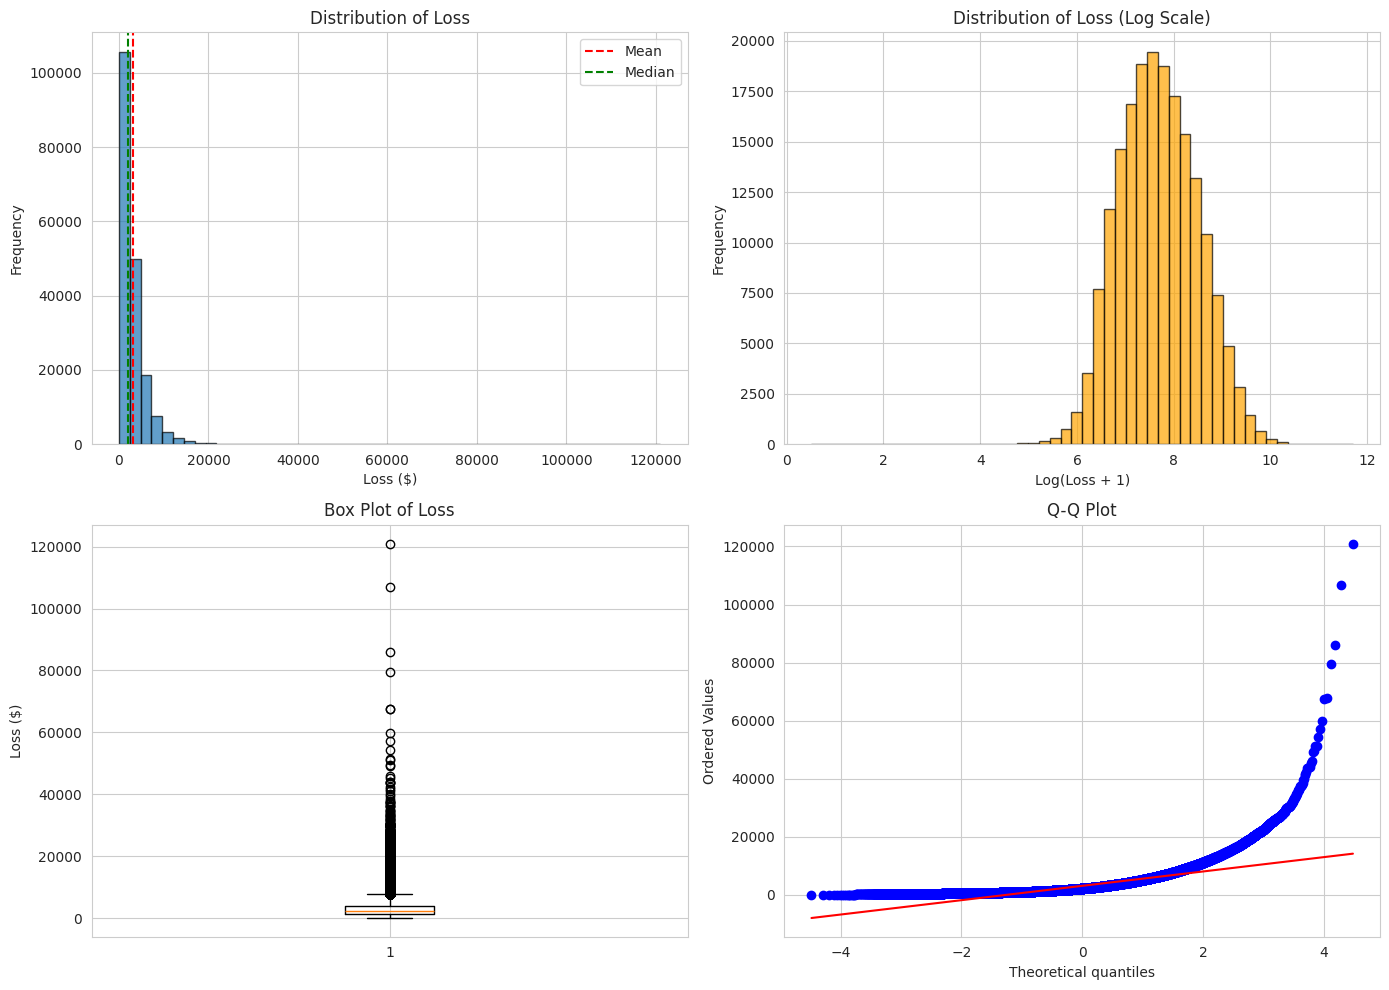

Saved: target_analysis.png


In [31]:
# ============================================================================
# PHASE 3: TARGET ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("PHASE 3: TARGET VARIABLE (LOSS)")
print("="*80)

loss = df['loss']
print(f"\nSummary Statistics:")
print(f"   Mean: ${loss.mean():,.2f}")
print(f"   Median: ${loss.median():,.2f}")
print(f"   Std: ${loss.std():,.2f}")
print(f"   Min: ${loss.min():,.2f}")
print(f"   Max: ${loss.max():,.2f}")
print(f"   Skewness: {loss.skew():.4f}")
print(f"   Zero losses: {(loss == 0).sum():,} ({(loss == 0).sum()/len(loss)*100:.2f}%)")

# Plot target
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(loss, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Loss ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Loss')
axes[0, 0].axvline(loss.mean(), color='red', linestyle='--', label=f'Mean')
axes[0, 0].axvline(loss.median(), color='green', linestyle='--', label=f'Median')
axes[0, 0].legend()

axes[0, 1].hist(np.log1p(loss), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('Log(Loss + 1)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Loss (Log Scale)')

axes[1, 0].boxplot(loss, vert=True)
axes[1, 0].set_ylabel('Loss ($)')
axes[1, 0].set_title('Box Plot of Loss')

stats.probplot(loss, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')

plt.tight_layout()
plt.savefig('target_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: target_analysis.png")


PHASE 4: CATEGORICAL FEATURES

 Cardinality Summary:
   Min: 2
   Max: 326
   Mean: 9.82
   Median: 2

 Low cardinality (≤5): 91
 Medium cardinality (6-20): 19
 High cardinality (>20): 6

 Top 10 Highest Cardinality:
        Unique_Values
cat116            326
cat110            131
cat109             84
cat113             61
cat112             51
cat115             23
cat105             20
cat107             20
cat101             19
cat114             19


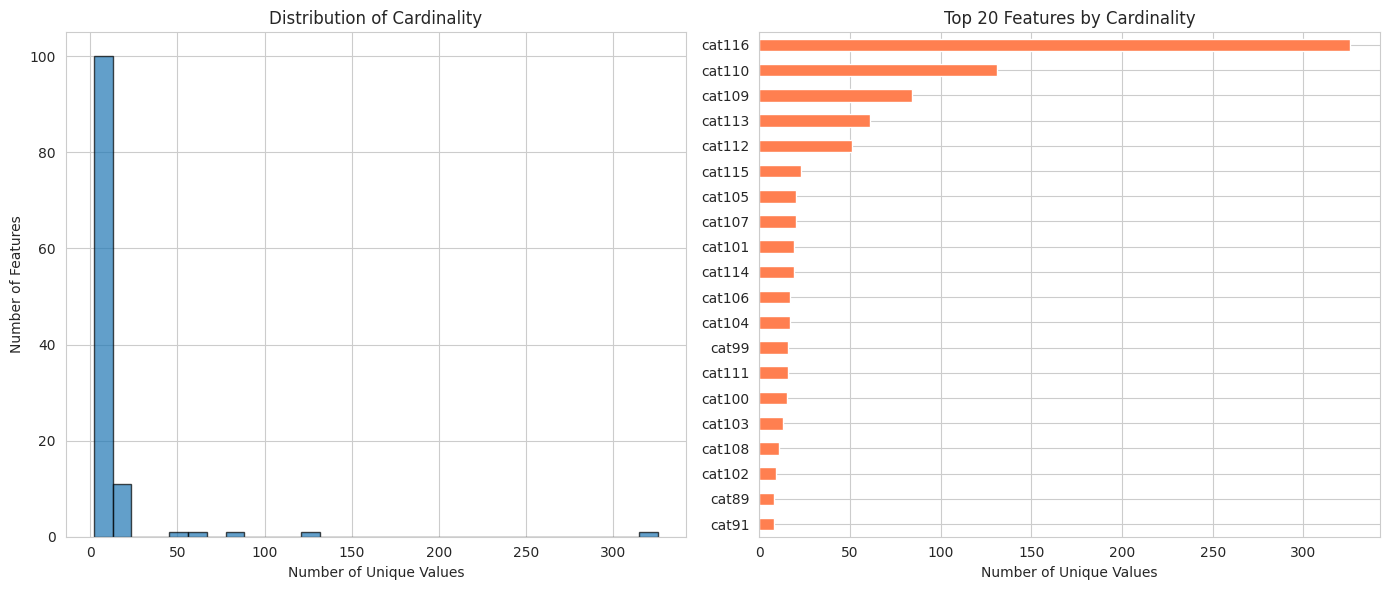

 Saved: categorical_cardinality.png


In [32]:
# ============================================================================
# PHASE 4: CATEGORICAL FEATURES
# ============================================================================
print("\n" + "="*80)
print("PHASE 4: CATEGORICAL FEATURES")
print("="*80)

cardinality = {col: df[col].nunique() for col in cat_cols}
cardinality_df = pd.DataFrame.from_dict(cardinality, orient='index', columns=['Unique_Values'])
cardinality_df = cardinality_df.sort_values('Unique_Values', ascending=False)

print(f"\n Cardinality Summary:")
print(f"   Min: {cardinality_df['Unique_Values'].min()}")
print(f"   Max: {cardinality_df['Unique_Values'].max()}")
print(f"   Mean: {cardinality_df['Unique_Values'].mean():.2f}")
print(f"   Median: {cardinality_df['Unique_Values'].median():.0f}")

low_card = cardinality_df[cardinality_df['Unique_Values'] <= 5]
med_card = cardinality_df[(cardinality_df['Unique_Values'] > 5) & (cardinality_df['Unique_Values'] <= 20)]
high_card = cardinality_df[cardinality_df['Unique_Values'] > 20]

print(f"\n Low cardinality (≤5): {len(low_card)}")
print(f" Medium cardinality (6-20): {len(med_card)}")
print(f" High cardinality (>20): {len(high_card)}")

print("\n Top 10 Highest Cardinality:")
print(cardinality_df.head(10))

# Plot cardinality
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(cardinality_df['Unique_Values'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Unique Values')
axes[0].set_ylabel('Number of Features')
axes[0].set_title('Distribution of Cardinality')

cardinality_df.head(20).plot(kind='barh', ax=axes[1], legend=False, color='coral')
axes[1].set_xlabel('Number of Unique Values')
axes[1].set_title('Top 20 Features by Cardinality')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('categorical_cardinality.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Saved: categorical_cardinality.png")

In [33]:
# ============================================================================
# PHASE 5: CONTINUOUS FEATURES
# ============================================================================
print("\n" + "="*80)
print("PHASE 5: CONTINUOUS FEATURES")
print("="*80)

print(f"\n Summary Statistics:")
print(df[cont_cols].describe().round(4))

corr_matrix = df[cont_cols].corr()

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr_pairs:
    print(f"\n Found {len(high_corr_pairs)} highly correlated pairs (|r| > 0.7):")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"   {feat1} ↔ {feat2}: {corr:.4f}")
else:
    print("\n No highly correlated pairs found")




PHASE 5: CONTINUOUS FEATURES

 Summary Statistics:
             cont1        cont2        cont3        cont4        cont5  \
count  188318.0000  188318.0000  188318.0000  188318.0000  188318.0000   
mean        0.4939       0.5072       0.4989       0.4918       0.4874   
std         0.1876       0.2072       0.2021       0.2113       0.2090   
min         0.0000       0.0011       0.0026       0.1769       0.2811   
25%         0.3461       0.3583       0.3370       0.3274       0.2811   
50%         0.4758       0.5558       0.5280       0.4529       0.4223   
75%         0.6239       0.6818       0.6342       0.6521       0.6433   
max         0.9850       0.8627       0.9443       0.9543       0.9837   

             cont6        cont7        cont8        cont9       cont10  \
count  188318.0000  188318.0000  188318.0000  188318.0000  188318.0000   
mean        0.4909       0.4850       0.4864       0.4855       0.4981   
std         0.2053       0.1785       0.1994       0.1817  

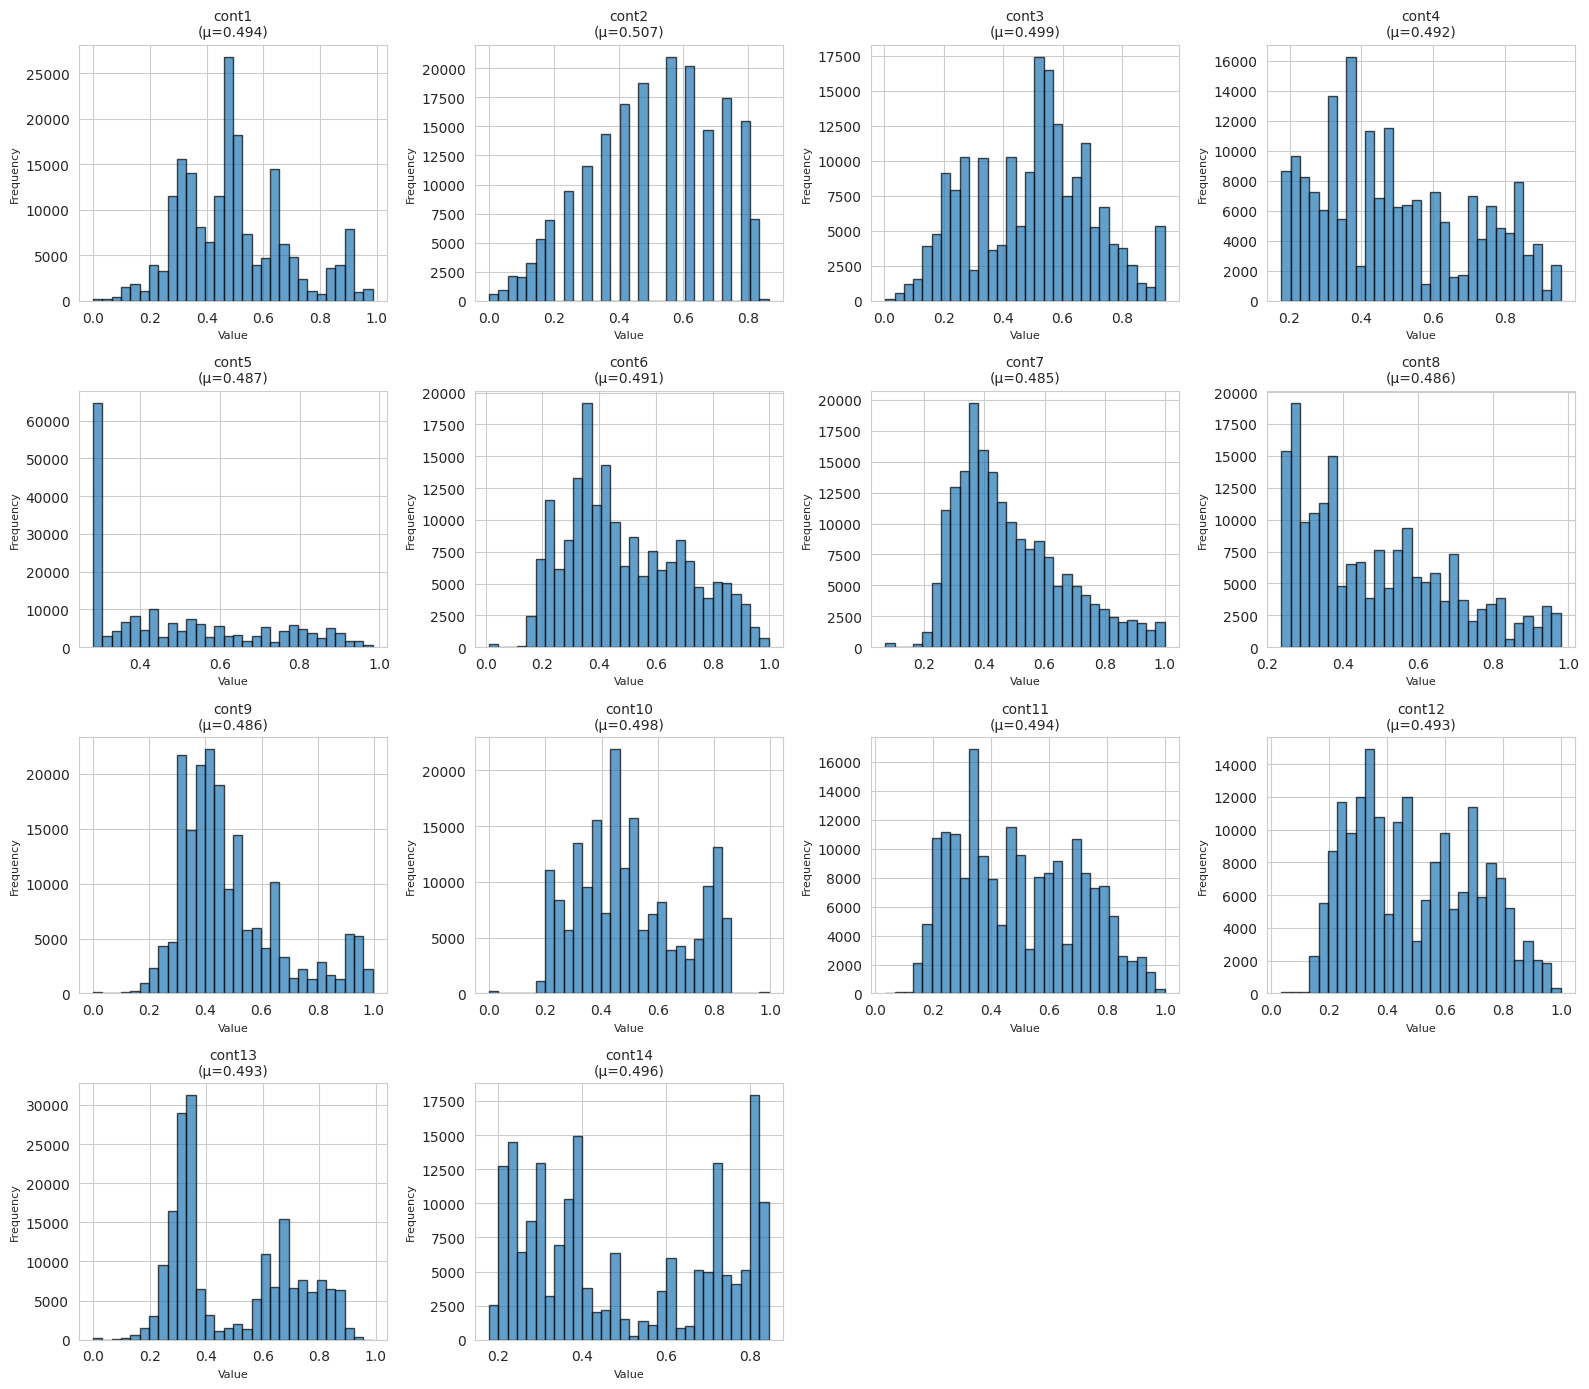

 Saved: continuous_distributions.png


In [34]:
# Plot distributions
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.ravel()

for idx, col in enumerate(cont_cols):
    axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}\n(μ={df[col].mean():.3f})', fontsize=10)
    axes[idx].set_xlabel('Value', fontsize=8)
    axes[idx].set_ylabel('Frequency', fontsize=8)

for idx in range(len(cont_cols), 16):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('continuous_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Saved: continuous_distributions.png")

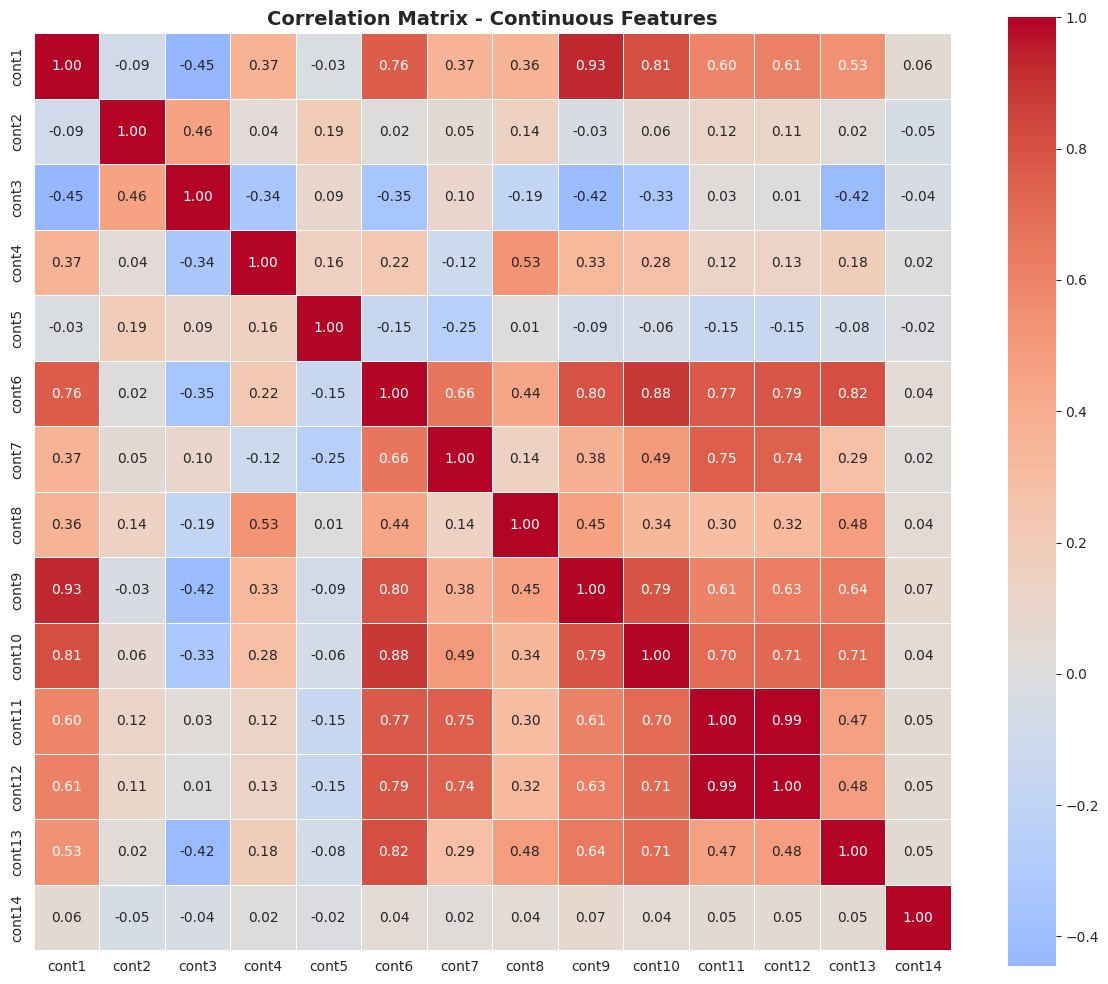

 Saved: correlation_heatmap.png


In [35]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix - Continuous Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Saved: correlation_heatmap.png")


PHASE 6: FEATURE-TARGET RELATIONSHIPS

 Continuous Features vs Loss:
cont2     0.141528
cont7     0.119799
cont3     0.111053
cont11    0.099806
cont12    0.098724
cont6     0.040967
cont8     0.030508
cont10    0.020236
cont14    0.019298
cont9     0.014456
cont13   -0.004022
cont1    -0.010237
cont5    -0.011355
cont4    -0.035831
Name: loss, dtype: float64


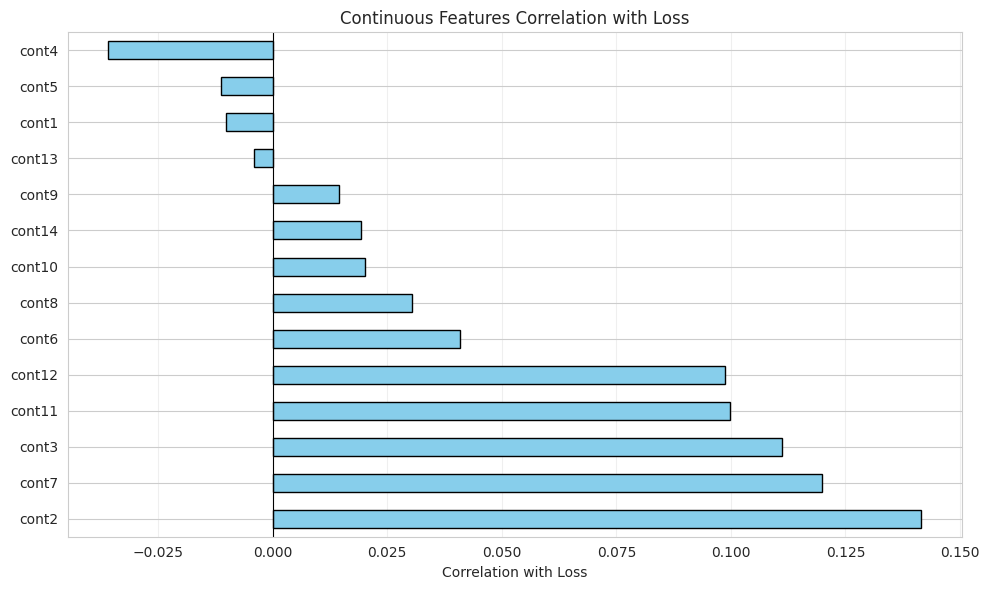

 Saved: feature_target_correlation.png


In [36]:
# ============================================================================
# PHASE 6: FEATURE-TARGET RELATIONSHIPS
# ============================================================================
print("\n" + "="*80)
print("PHASE 6: FEATURE-TARGET RELATIONSHIPS")
print("="*80)

cont_target_corr = df[cont_cols + ['loss']].corr()['loss'].drop('loss').sort_values(ascending=False)
print("\n Continuous Features vs Loss:")
print(cont_target_corr)

# Plot correlation
plt.figure(figsize=(10, 6))
cont_target_corr.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Correlation with Loss')
plt.title('Continuous Features Correlation with Loss')
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_target_correlation.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Saved: feature_target_correlation.png")



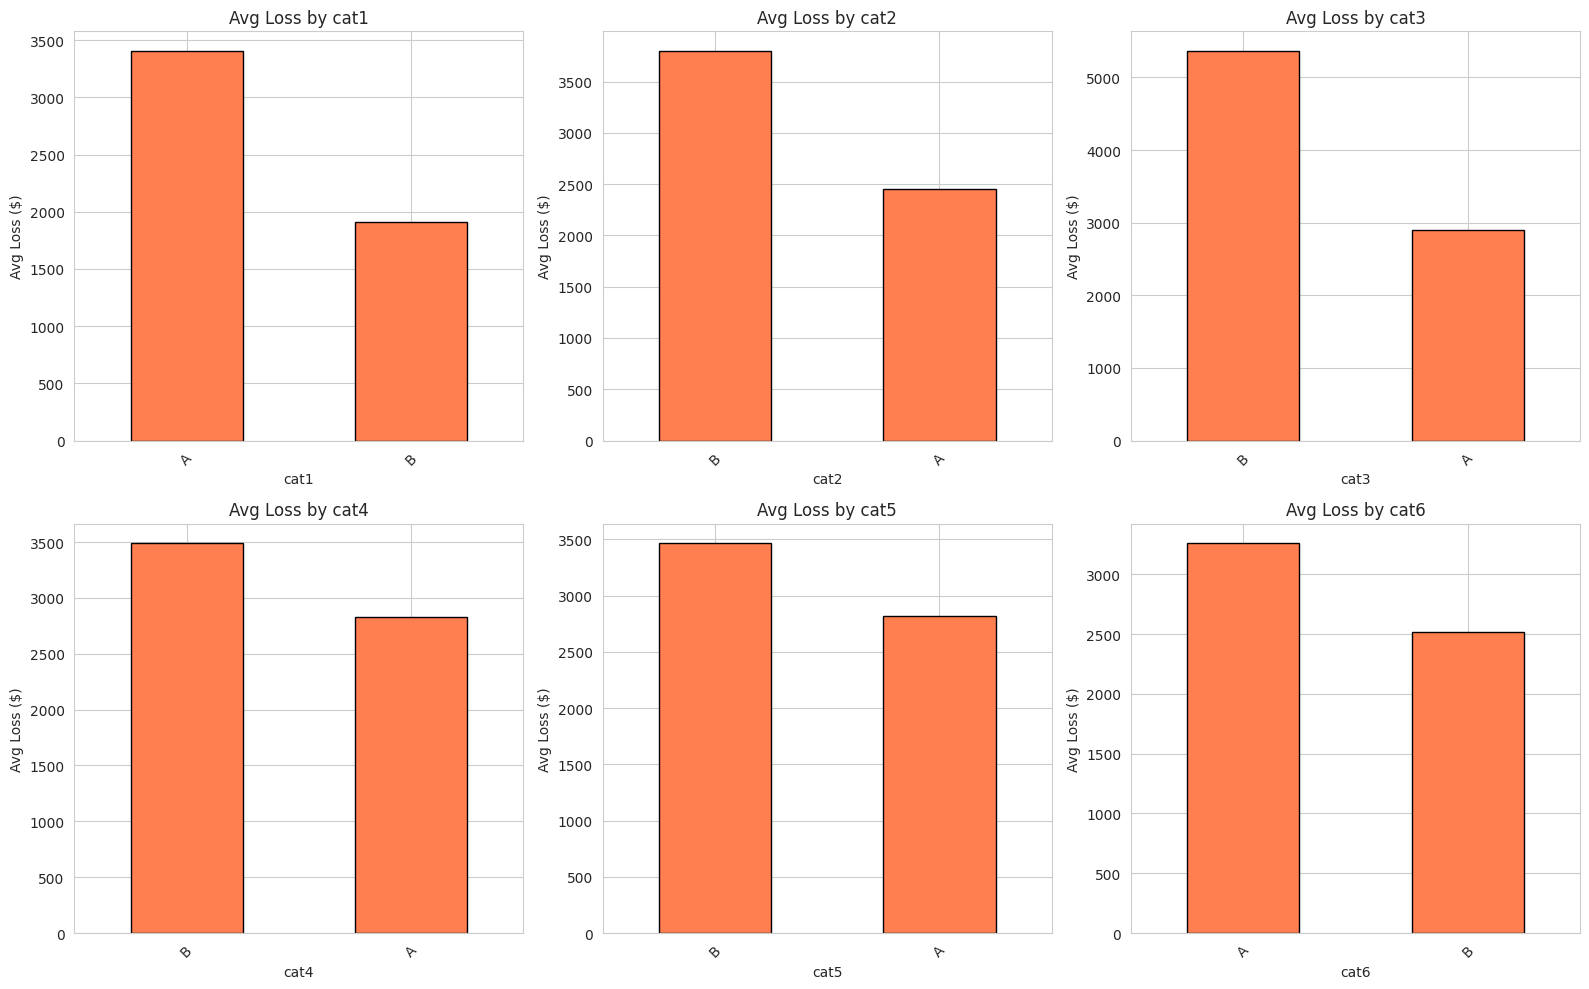

 Saved: categorical_target_relationship.png


In [37]:
# Categorical vs target
low_card_features = [col for col in cat_cols if df[col].nunique() <= 10][:6]

if len(low_card_features) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.ravel()

    for idx, col in enumerate(low_card_features):
        avg_loss = df.groupby(col)['loss'].mean().sort_values(ascending=False)
        avg_loss.plot(kind='bar', ax=axes[idx], color='coral', edgecolor='black')
        axes[idx].set_title(f'Avg Loss by {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Avg Loss ($)')
        axes[idx].tick_params(axis='x', rotation=45)

    for idx in range(len(low_card_features), 6):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig('categorical_target_relationship.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(" Saved: categorical_target_relationship.png")


In [38]:
# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*80)
print("✅ EDA COMPLETE!")
print("="*80)
print("\n📁 Generated 6 PNG files (check left sidebar)")
print(f"\n📊 Dataset: {len(df):,} rows, {len(cat_cols)} categorical, {len(cont_cols)} continuous")
print(f"💰 Mean loss: ${df['loss'].mean():,.2f}, Median: ${df['loss'].median():,.2f}")
print("\n🚀 Next: Create frequency target and prepare for modeling")
print("="*80)


✅ EDA COMPLETE!

📁 Generated 6 PNG files (check left sidebar)

📊 Dataset: 188,318 rows, 116 categorical, 14 continuous
💰 Mean loss: $3,037.34, Median: $2,115.57

🚀 Next: Create frequency target and prepare for modeling


PHASE 2: PREPROCESSING & DUAL BASELINE MODELS

Baseline Strategy:
  1. Gamma GLM (Traditional Actuarial Approach)
  2. XGBoost (Modern Machine Learning Approach)
  3. Phase 3: NeurFS (Deep Learning - Our Target)

STEP 1: TARGET TRANSFORMATION

Original loss statistics:
  Mean:     $3,037.34
  Median:   $2,115.57
  Std Dev:  $2,904.09
  Skewness: 3.79
  Min:      $0.67
  Max:      $121,012.25

Log-transformed loss statistics:
  Mean:     7.6859
  Median:   7.6576
  Std Dev:  0.8113
  Skewness: 0.10


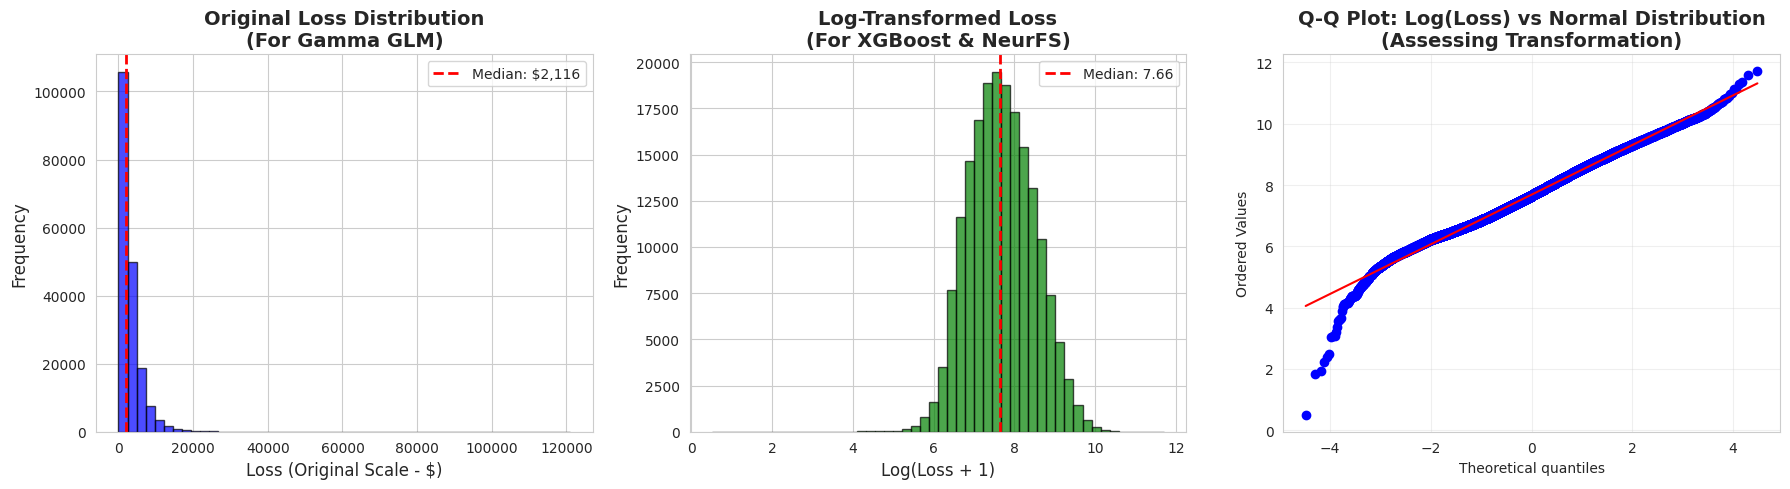


✅ Target transformation complete!
   Skewness reduced: 3.79 → 0.10


In [39]:
# ================================================================================
# PHASE 2: PREPROCESSING & DUAL BASELINE MODELS
# ================================================================================
# Comprehensive baseline comparison: Gamma (TWEEDIE) GLM (Actuarial) + XGBoost (ML)


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
import matplotlib
matplotlib.use('inline')
plt.rcParams['figure.figsize'] = (15, 5)

print("="*80)
print("PHASE 2: PREPROCESSING & DUAL BASELINE MODELS")
print("="*80)
print("\nBaseline Strategy:")
print("  1. Gamma GLM (Traditional Actuarial Approach)")
print("  2. XGBoost (Modern Machine Learning Approach)")
print("  3. Phase 3: NeurFS (Deep Learning - Our Target)")

# ================================================================================
# STEP 1: TARGET TRANSFORMATION
# ================================================================================
print("\n" + "="*80)
print("STEP 1: TARGET TRANSFORMATION")
print("="*80)

# For Gamma GLM: Use original scale (Gamma distribution handles positive skewed data)
# For XGBoost & NeurFS: Use log transformation

df['log_loss'] = np.log1p(df['loss'])

print(f"\nOriginal loss statistics:")
print(f"  Mean:     ${df['loss'].mean():,.2f}")
print(f"  Median:   ${df['loss'].median():,.2f}")
print(f"  Std Dev:  ${df['loss'].std():,.2f}")
print(f"  Skewness: {df['loss'].skew():.2f}")
print(f"  Min:      ${df['loss'].min():,.2f}")
print(f"  Max:      ${df['loss'].max():,.2f}")

print(f"\nLog-transformed loss statistics:")
print(f"  Mean:     {df['log_loss'].mean():.4f}")
print(f"  Median:   {df['log_loss'].median():.4f}")
print(f"  Std Dev:  {df['log_loss'].std():.4f}")
print(f"  Skewness: {df['log_loss'].skew():.2f}")

# Visualize transformation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original distribution
axes[0].hist(df['loss'], bins=50, edgecolor='black', alpha=0.7, color='blue')
axes[0].set_xlabel('Loss (Original Scale - $)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Original Loss Distribution\n(For Gamma GLM)', fontsize=14, fontweight='bold')
axes[0].axvline(df['loss'].median(), color='red', linestyle='--', linewidth=2,
                label=f'Median: ${df["loss"].median():,.0f}')
axes[0].legend(fontsize=10)

# Log-transformed distribution
axes[1].hist(df['log_loss'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].set_xlabel('Log(Loss + 1)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Log-Transformed Loss\n(For XGBoost & NeurFS)', fontsize=14, fontweight='bold')
axes[1].axvline(df['log_loss'].median(), color='red', linestyle='--', linewidth=2,
                label=f'Median: {df["log_loss"].median():.2f}')
axes[1].legend(fontsize=10)

# Q-Q plot for normality assessment (after log transform)
from scipy import stats
stats.probplot(df['log_loss'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot: Log(Loss) vs Normal Distribution\n(Assessing Transformation)',
                  fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("\n✅ Target transformation complete!")
print(f"   Skewness reduced: {df['loss'].skew():.2f} → {df['log_loss'].skew():.2f}")



In [40]:
# ================================================================================
# STEP 2: FEATURE ENCODING
# ================================================================================
print("\n" + "="*80)
print("STEP 2: FEATURE ENCODING")
print("="*80)

# Identify features
cat_cols = [col for col in df.columns if col.startswith('cat')]
cont_cols = [col for col in df.columns if col.startswith('cont')]

print(f"\nFeature inventory:")
print(f"  Categorical: {len(cat_cols)} features")
print(f"  Continuous:  {len(cont_cols)} features")

# Analyze cardinality
cat_cardinality = {col: df[col].nunique() for col in cat_cols}
low_card = [col for col, card in cat_cardinality.items() if card <= 5]
med_card = [col for col, card in cat_cardinality.items() if 5 < card <= 20]
high_card = [col for col, card in cat_cardinality.items() if card > 20]

print(f"\nCardinality distribution:")
print(f"  Low (≤5):      {len(low_card)} features")
print(f"  Medium (6-20): {len(med_card)} features")
print(f"  High (>20):    {len(high_card)} features")

print(f"\nHigh-cardinality features (perfect for embeddings in NeurFS):")
for col in high_card:
    print(f"  • {col}: {cat_cardinality[col]} unique values")

# Label encoding for tree-based models (XGBoost)
print("\n🔄 Encoding categorical features (Label Encoding)...")
df_encoded = df.copy()
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

print("✅ Categorical encoding complete!")

# Handle multicollinearity in continuous features
print("\n🔍 Multicollinearity check (continuous features)...")
corr_matrix = df[cont_cols].corr()

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr_pairs.append((corr_matrix.columns[i],
                                   corr_matrix.columns[j],
                                   corr_matrix.iloc[i, j]))

if high_corr_pairs:
    print(f"⚠️  Found {len(high_corr_pairs)} highly correlated pairs (|r| > 0.9):")
    for col1, col2, corr_val in high_corr_pairs:
        print(f"  • {col1} ↔ {col2}: r = {corr_val:.4f}")

    # Drop redundant features
    cols_to_drop = list(set([pair[1] for pair in high_corr_pairs]))
    print(f"\n🗑️  Dropping {len(cols_to_drop)} redundant features: {cols_to_drop}")
    df_encoded = df_encoded.drop(columns=cols_to_drop)
    cont_cols = [col for col in cont_cols if col not in cols_to_drop]
else:
    print("✅ No problematic multicollinearity detected!")

print(f"\n✅ Feature engineering complete!")
print(f"   Final feature count: {len(cat_cols) + len(cont_cols)}")




STEP 2: FEATURE ENCODING

Feature inventory:
  Categorical: 116 features
  Continuous:  14 features

Cardinality distribution:
  Low (≤5):      91 features
  Medium (6-20): 19 features
  High (>20):    6 features

High-cardinality features (perfect for embeddings in NeurFS):
  • cat109: 84 unique values
  • cat110: 131 unique values
  • cat112: 51 unique values
  • cat113: 61 unique values
  • cat115: 23 unique values
  • cat116: 326 unique values

🔄 Encoding categorical features (Label Encoding)...
✅ Categorical encoding complete!

🔍 Multicollinearity check (continuous features)...
⚠️  Found 2 highly correlated pairs (|r| > 0.9):
  • cont1 ↔ cont9: r = 0.9299
  • cont11 ↔ cont12: r = 0.9944

🗑️  Dropping 2 redundant features: ['cont12', 'cont9']

✅ Feature engineering complete!
   Final feature count: 128


In [41]:
# ================================================================================
# STEP 3: TRAIN/VALIDATION/TEST SPLIT
# ================================================================================
print("\n" + "="*80)
print("STEP 3: DATA SPLITTING (60/20/20)")
print("="*80)

feature_cols = cat_cols + cont_cols

# Prepare feature matrices and targets
X = df_encoded[feature_cols]
y_original = df_encoded['loss']        # For Gamma GLM
y_log = df_encoded['log_loss']         # For XGBoost

print(f"\nData dimensions:")
print(f"  Feature matrix: {X.shape}")
print(f"  Target (original): {y_original.shape}")
print(f"  Target (log): {y_log.shape}")

# Split 1: 80% temp, 20% test
X_temp, X_test, y_orig_temp, y_orig_test, y_log_temp, y_log_test = train_test_split(
    X, y_original, y_log, test_size=0.2, random_state=42, shuffle=True
)

# Split 2: 75% train, 25% val (from temp → 60/20 overall)
X_train, X_val, y_orig_train, y_orig_val, y_log_train, y_log_val = train_test_split(
    X_temp, y_orig_temp, y_log_temp, test_size=0.25, random_state=42, shuffle=True
)

print(f"\n📦 Data splits:")
print(f"  Training:   {X_train.shape[0]:>7,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Validation: {X_val.shape[0]:>7,} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"  Test:       {X_test.shape[0]:>7,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\n📊 Target distribution check:")
print(f"  Train  - Original: ${y_orig_train.mean():>8,.2f}, Log: {y_log_train.mean():>6.4f}")
print(f"  Val    - Original: ${y_orig_val.mean():>8,.2f}, Log: {y_log_val.mean():>6.4f}")
print(f"  Test   - Original: ${y_orig_test.mean():>8,.2f}, Log: {y_log_test.mean():>6.4f}")
print("✅ Splits are well-balanced!")




STEP 3: DATA SPLITTING (60/20/20)

Data dimensions:
  Feature matrix: (188318, 128)
  Target (original): (188318,)
  Target (log): (188318,)

📦 Data splits:
  Training:   112,990 samples (60.0%)
  Validation:  37,664 samples (20.0%)
  Test:        37,664 samples (20.0%)

📊 Target distribution check:
  Train  - Original: $3,036.02, Log: 7.6850
  Val    - Original: $3,050.47, Log: 7.6878
  Test   - Original: $3,028.16, Log: 7.6868
✅ Splits are well-balanced!


In [42]:
# ================================================================================
# STEP 4A: BASELINE 1 - TWEEDIE GLM (ACTUARIAL STANDARD)
# ================================================================================
print("\n" + "="*80)
print("BASELINE 1: TWEEDIE GLM (Actuarial Standard for Insurance)")
print("="*80)

print("\n🎯 Model Specification:")
print("  • Distribution: Tweedie (power=1.5, between Poisson and Gamma)")
print("  • Link Function: Log")
print("  • Theory: Tweedie naturally handles right-skewed insurance claims")
print("  • Actuarial Standard: Preferred for insurance severity modeling")
print("\n📚 Note: Tweedie is a generalization of Gamma that's more robust")
print("         for insurance data with zeros and extreme skewness")

# Use sklearn's TweedieRegressor (more robust than statsmodels for this data)
from sklearn.linear_model import TweedieRegressor

print("\n⏳ Training Tweedie GLM...")
print("   (This may take 2-3 minutes)")

# Tweedie GLM with log link (power=1.5 is between Poisson and Gamma)
tweedie_glm = TweedieRegressor(
    power=1.5,           # Between Poisson (1) and Gamma (2)
    alpha=0.1,           # L2 regularization
    link='log',          # Log link function
    max_iter=300,        # Maximum iterations
    tol=1e-4,           # Convergence tolerance
    verbose=1
)

tweedie_glm.fit(X_train, y_orig_train)

print("\n✅ Tweedie GLM training complete!")

# Make predictions
print("\n🔮 Generating predictions...")
glm_train_pred = tweedie_glm.predict(X_train)
glm_val_pred = tweedie_glm.predict(X_val)
glm_test_pred = tweedie_glm.predict(X_test)

# Ensure predictions are positive (GLM should guarantee this, but just in case)
glm_train_pred = np.maximum(glm_train_pred, 0.01)
glm_val_pred = np.maximum(glm_val_pred, 0.01)
glm_test_pred = np.maximum(glm_test_pred, 0.01)

# Calculate metrics
def calculate_metrics(y_true, y_pred, model_name, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n{model_name} - {dataset_name} Set:")
    print(f"  MAE:   ${mae:>10,.2f}")
    print(f"  RMSE:  ${rmse:>10,.2f}")
    print(f"  R²:    {r2:>11.4f}")
    print(f"  MAPE:  {mape:>10.2f}%")

    return {'MAE': mae, 'RMSE': rmse, 'R2': r2, 'MAPE': mape}

glm_train_metrics = calculate_metrics(y_orig_train, glm_train_pred, "Tweedie GLM", "Training")
glm_val_metrics = calculate_metrics(y_orig_val, glm_val_pred, "Tweedie GLM", "Validation")
glm_test_metrics = calculate_metrics(y_orig_test, glm_test_pred, "Tweedie GLM", "Test")

# Overfitting check
train_val_diff = abs(glm_train_metrics['MAE'] - glm_val_metrics['MAE'])
print(f"\n🔍 Overfitting Check: Train-Val MAE difference = ${train_val_diff:.2f}")
if train_val_diff < 100:
    print("   ✅ Excellent - No overfitting")
elif train_val_diff < 300:
    print("   ⚠️  Moderate overfitting")
else:
    print("   ❌ Significant overfitting detected")




BASELINE 1: TWEEDIE GLM (Actuarial Standard for Insurance)

🎯 Model Specification:
  • Distribution: Tweedie (power=1.5, between Poisson and Gamma)
  • Link Function: Log
  • Theory: Tweedie naturally handles right-skewed insurance claims
  • Actuarial Standard: Preferred for insurance severity modeling

📚 Note: Tweedie is a generalization of Gamma that's more robust
         for insurance data with zeros and extreme skewness

⏳ Training Tweedie GLM...
   (This may take 2-3 minutes)

✅ Tweedie GLM training complete!

🔮 Generating predictions...

Tweedie GLM - Training Set:
  MAE:   $  1,332.25
  RMSE:  $  2,702.95
  R²:         0.1261
  MAPE:       71.05%

Tweedie GLM - Validation Set:
  MAE:   $  1,335.82
  RMSE:  $  2,246.52
  R²:         0.4347
  MAPE:       68.35%

Tweedie GLM - Test Set:
  MAE:   $  1,322.10
  RMSE:  $  2,168.51
  R²:         0.4237
  MAPE:       66.65%

🔍 Overfitting Check: Train-Val MAE difference = $3.58
   ✅ Excellent - No overfitting


In [43]:
# ================================================================================
# STEP 4B: BASELINE 2 - XGBOOST (MODERN ML)
# ================================================================================
print("\n" + "="*80)
print("BASELINE 2: XGBOOST (Modern Machine Learning Approach)")
print("="*80)

print("\n🎯 Model Specification:")
print("  • Algorithm: Gradient Boosting Decision Trees")
print("  • Trees: 300")
print("  • Max Depth: 6")
print("  • Learning Rate: 0.05")
print("  • Target: Log-transformed loss (handles skewness)")

print("\n⏳ Training XGBoost...")

xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    eval_metric='mae'
)

# Train with early stopping
eval_set = [(X_train, y_log_train), (X_val, y_log_val)]
xgb_model.fit(
    X_train, y_log_train,
    eval_set=eval_set,
    verbose=50
)

print("\n✅ XGBoost training complete!")

# Make predictions (on log scale, then transform back)
print("\n🔮 Generating predictions...")
xgb_train_pred_log = xgb_model.predict(X_train)
xgb_val_pred_log = xgb_model.predict(X_val)
xgb_test_pred_log = xgb_model.predict(X_test)

# Transform back to original scale
xgb_train_pred = np.expm1(xgb_train_pred_log)
xgb_val_pred = np.expm1(xgb_val_pred_log)
xgb_test_pred = np.expm1(xgb_test_pred_log)

# Calculate metrics
xgb_train_metrics = calculate_metrics(y_orig_train, xgb_train_pred, "XGBoost", "Training")
xgb_val_metrics = calculate_metrics(y_orig_val, xgb_val_pred, "XGBoost", "Validation")
xgb_test_metrics = calculate_metrics(y_orig_test, xgb_test_pred, "XGBoost", "Test")

# Overfitting check
train_val_diff = abs(xgb_train_metrics['MAE'] - xgb_val_metrics['MAE'])
print(f"\n🔍 Overfitting Check: Train-Val MAE difference = ${train_val_diff:.2f}")
if train_val_diff < 100:
    print("   ✅ Excellent - No overfitting")
elif train_val_diff < 300:
    print("   ⚠️  Moderate overfitting")
else:
    print("   ❌ Significant overfitting detected")




BASELINE 2: XGBOOST (Modern Machine Learning Approach)

🎯 Model Specification:
  • Algorithm: Gradient Boosting Decision Trees
  • Trees: 300
  • Max Depth: 6
  • Learning Rate: 0.05
  • Target: Log-transformed loss (handles skewness)

⏳ Training XGBoost...
[0]	validation_0-mae:0.64537	validation_1-mae:0.64893
[50]	validation_0-mae:0.45033	validation_1-mae:0.45736
[100]	validation_0-mae:0.42370	validation_1-mae:0.43428
[150]	validation_0-mae:0.41351	validation_1-mae:0.42721
[200]	validation_0-mae:0.40796	validation_1-mae:0.42409
[250]	validation_0-mae:0.40379	validation_1-mae:0.42239
[299]	validation_0-mae:0.40041	validation_1-mae:0.42125

✅ XGBoost training complete!

🔮 Generating predictions...

XGBoost - Training Set:
  MAE:   $  1,090.74
  RMSE:  $  1,804.33
  R²:         0.6106
  MAPE:       47.06%

XGBoost - Validation Set:
  MAE:   $  1,169.46
  RMSE:  $  2,068.99
  R²:         0.5205
  MAPE:       49.29%

XGBoost - Test Set:
  MAE:   $  1,144.87
  RMSE:  $  1,918.75
  R²:     

In [44]:
# ================================================================================
# STEP 5: BASELINE COMPARISON
# ================================================================================
print("\n" + "="*80)
print("STEP 5: BASELINE MODEL COMPARISON")
print("="*80)

# Create comparison table
comparison_df = pd.DataFrame({
    'Model': ['Tweedie GLM', 'XGBoost'],
    'Test MAE': [glm_test_metrics['MAE'], xgb_test_metrics['MAE']],
    'Test RMSE': [glm_test_metrics['RMSE'], xgb_test_metrics['RMSE']],
    'Test R²': [glm_test_metrics['R2'], xgb_test_metrics['R2']],
    'Test MAPE': [glm_test_metrics['MAPE'], xgb_test_metrics['MAPE']]
})

print("\n📊 Test Set Performance Comparison:")
print(comparison_df.to_string(index=False))

# Determine better model
if xgb_test_metrics['MAE'] < glm_test_metrics['MAE']:
    improvement = ((glm_test_metrics['MAE'] - xgb_test_metrics['MAE']) / glm_test_metrics['MAE']) * 100
    print(f"\n🏆 Winner: XGBoost")
    print(f"   • {improvement:.1f}% lower MAE than Tweedie GLM")
    print(f"   • Modern ML beats traditional GLM on this dataset")
else:
    improvement = ((xgb_test_metrics['MAE'] - glm_test_metrics['MAE']) / xgb_test_metrics['MAE']) * 100
    print(f"\n🏆 Winner: Tweedie GLM")
    print(f"   • {improvement:.1f}% lower MAE than XGBoost")
    print(f"   • Traditional approach still competitive!")




STEP 5: BASELINE MODEL COMPARISON

📊 Test Set Performance Comparison:
      Model    Test MAE   Test RMSE  Test R²  Test MAPE
Tweedie GLM 1322.102844 2168.506265 0.423695  66.645222
    XGBoost 1144.865085 1918.750429 0.548801  47.982973

🏆 Winner: XGBoost
   • 13.4% lower MAE than Tweedie GLM
   • Modern ML beats traditional GLM on this dataset



STEP 6: VISUALIZATION DASHBOARD


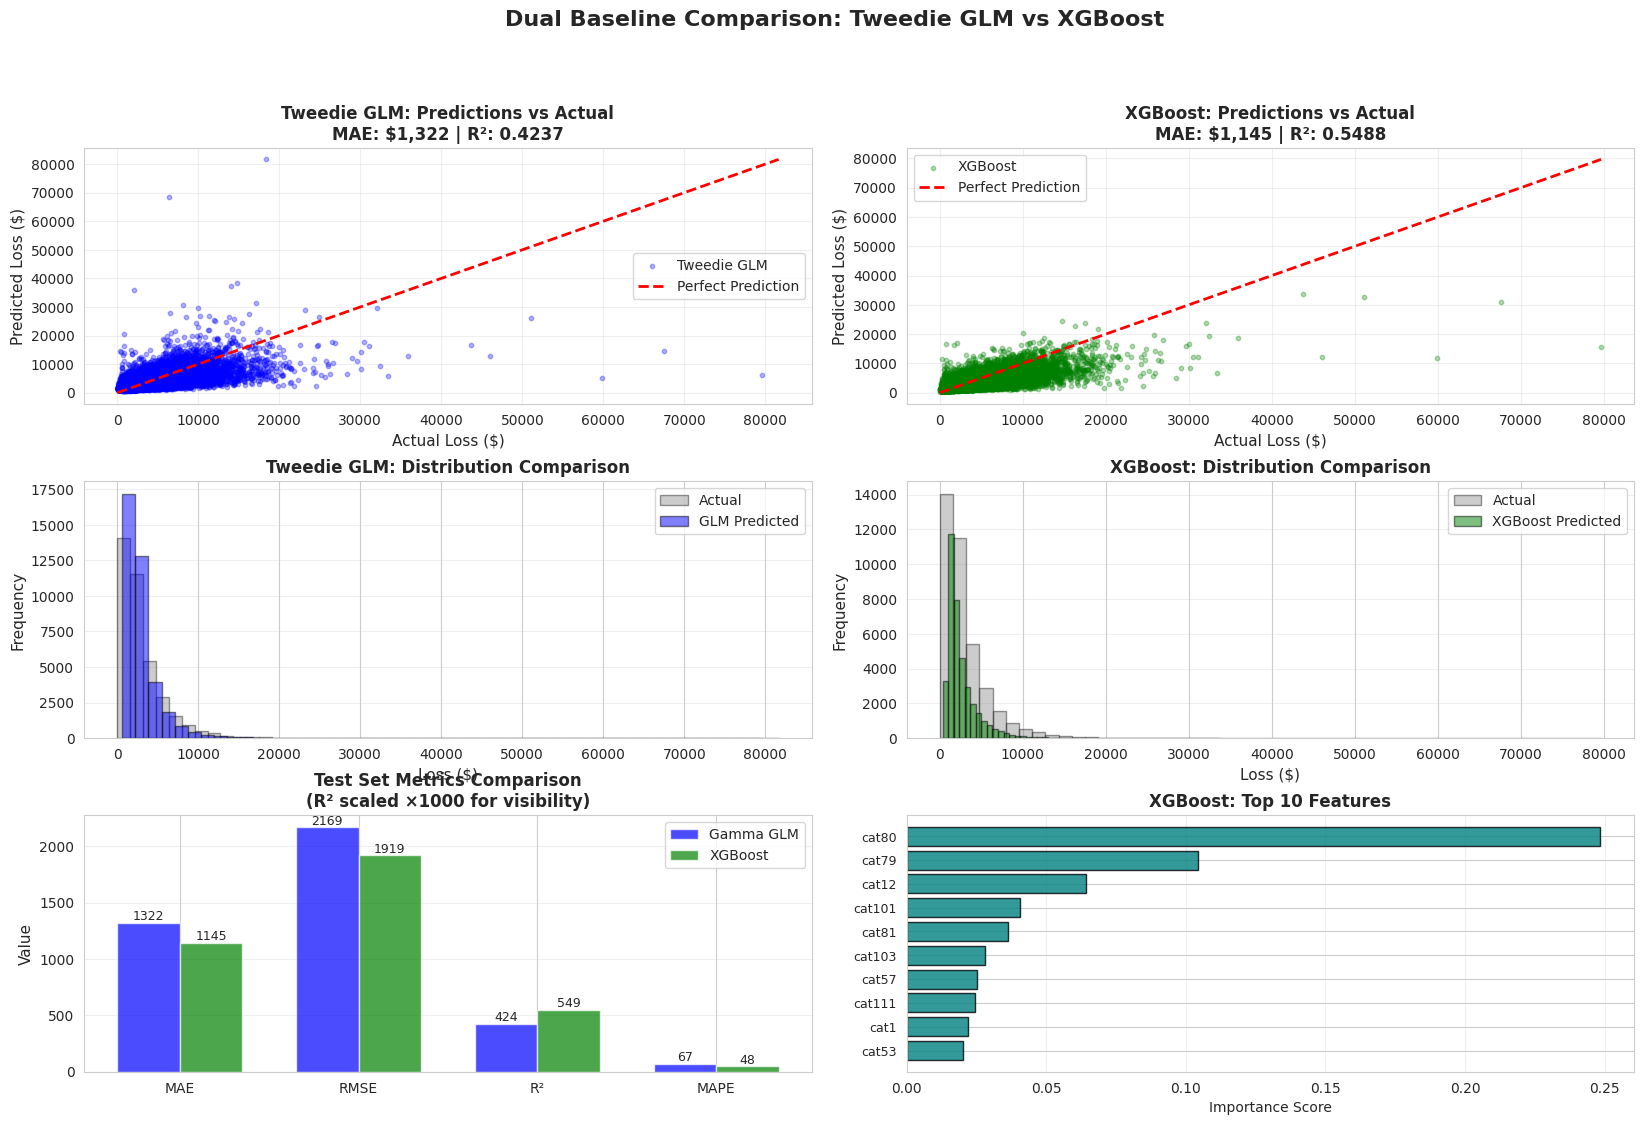


✅ Comprehensive dashboard displayed!


In [45]:
# ================================================================================
# STEP 6: COMPREHENSIVE VISUALIZATIONS
# ================================================================================
print("\n" + "="*80)
print("STEP 6: VISUALIZATION DASHBOARD")
print("="*80)

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# Row 1: Predictions vs Actual (GLM and XGBoost side by side)
ax1 = fig.add_subplot(gs[0, :2])
ax1.scatter(y_orig_test, glm_test_pred, alpha=0.3, s=10, label='Tweedie GLM', color='blue')
max_val = max(y_orig_test.max(), glm_test_pred.max())
ax1.plot([0, max_val], [0, max_val], 'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Loss ($)', fontsize=11)
ax1.set_ylabel('Predicted Loss ($)', fontsize=11)
ax1.set_title(f'Tweedie GLM: Predictions vs Actual\nMAE: ${glm_test_metrics["MAE"]:,.0f} | R²: {glm_test_metrics["R2"]:.4f}',
              fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2 = fig.add_subplot(gs[0, 2:])
ax2.scatter(y_orig_test, xgb_test_pred, alpha=0.3, s=10, label='XGBoost', color='green')
max_val = max(y_orig_test.max(), xgb_test_pred.max())
ax2.plot([0, max_val], [0, max_val], 'r--', lw=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Loss ($)', fontsize=11)
ax2.set_ylabel('Predicted Loss ($)', fontsize=11)
ax2.set_title(f'XGBoost: Predictions vs Actual\nMAE: ${xgb_test_metrics["MAE"]:,.0f} | R²: {xgb_test_metrics["R2"]:.4f}',
              fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Row 2: Distribution Comparison
ax3 = fig.add_subplot(gs[1, :2])
ax3.hist(y_orig_test, bins=50, alpha=0.4, label='Actual', color='gray', edgecolor='black')
ax3.hist(glm_test_pred, bins=50, alpha=0.5, label='GLM Predicted', color='blue', edgecolor='black')
ax3.set_xlabel('Loss ($)', fontsize=11)
ax3.set_ylabel('Frequency', fontsize=11)
ax3.set_title('Tweedie GLM: Distribution Comparison', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

ax4 = fig.add_subplot(gs[1, 2:])
ax4.hist(y_orig_test, bins=50, alpha=0.4, label='Actual', color='gray', edgecolor='black')
ax4.hist(xgb_test_pred, bins=50, alpha=0.5, label='XGBoost Predicted', color='green', edgecolor='black')
ax4.set_xlabel('Loss ($)', fontsize=11)
ax4.set_ylabel('Frequency', fontsize=11)
ax4.set_title('XGBoost: Distribution Comparison', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# Row 3: Performance Metrics Comparison
ax5 = fig.add_subplot(gs[2, :2])
metrics = ['MAE', 'RMSE', 'R²', 'MAPE']
glm_values = [glm_test_metrics['MAE'], glm_test_metrics['RMSE'],
              glm_test_metrics['R2']*1000, glm_test_metrics['MAPE']]
xgb_values = [xgb_test_metrics['MAE'], xgb_test_metrics['RMSE'],
              xgb_test_metrics['R2']*1000, xgb_test_metrics['MAPE']]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax5.bar(x - width/2, glm_values, width, label='Gamma GLM', color='blue', alpha=0.7)
bars2 = ax5.bar(x + width/2, xgb_values, width, label='XGBoost', color='green', alpha=0.7)

ax5.set_ylabel('Value', fontsize=11)
ax5.set_title('Test Set Metrics Comparison\n(R² scaled ×1000 for visibility)',
              fontsize=12, fontweight='bold')
ax5.set_xticks(x)
ax5.set_xticklabels(metrics)
ax5.legend()
ax5.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.0f}', ha='center', va='bottom', fontsize=9)

# Row 3: Feature Importance (XGBoost only)
ax6 = fig.add_subplot(gs[2, 2:])
feature_importance = xgb_model.feature_importances_
top_10_idx = np.argsort(feature_importance)[-10:]
top_10_features = [feature_cols[i] for i in top_10_idx]
top_10_scores = feature_importance[top_10_idx]

ax6.barh(range(10), top_10_scores, color='teal', edgecolor='black', alpha=0.8)
ax6.set_yticks(range(10))
ax6.set_yticklabels(top_10_features, fontsize=9)
ax6.set_xlabel('Importance Score', fontsize=10)
ax6.set_title('XGBoost: Top 10 Features', fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3, axis='x')

plt.suptitle('Dual Baseline Comparison: Tweedie GLM vs XGBoost',
             fontsize=16, fontweight='bold', y=0.995)

plt.show()
print("\n✅ Comprehensive dashboard displayed!")



In [46]:
# ================================================================================
# STEP 7: SAVE RESULTS FOR PHASE 3
# ================================================================================
print("\n" + "="*80)
print("STEP 7: PREPARING FOR PHASE 3 (NeurFS)")
print("="*80)

# Store results for comparison with NeurFS
baseline_results = {
    'tweedie_glm': {
        'test_mae': glm_test_metrics['MAE'],
        'test_rmse': glm_test_metrics['RMSE'],
        'test_r2': glm_test_metrics['R2'],
        'test_mape': glm_test_metrics['MAPE']
    },
    'xgboost': {
        'test_mae': xgb_test_metrics['MAE'],
        'test_rmse': xgb_test_metrics['RMSE'],
        'test_r2': xgb_test_metrics['R2'],
        'test_mape': xgb_test_metrics['MAPE']
    }
}

print("\n📊 Baseline Results Saved:")
print(f"  • Tweedie GLM Test MAE:  ${baseline_results['tweedie_glm']['test_mae']:,.2f}")
print(f"  • XGBoost Test MAE:      ${baseline_results['xgboost']['test_mae']:,.2f}")

print("\n🎯 Target for NeurFS (Phase 3):")
best_mae = min(glm_test_metrics['MAE'], xgb_test_metrics['MAE'])
print(f"  • Beat: ${best_mae:,.2f} (current best MAE)")
print(f"  • Goal: Achieve MAE < ${best_mae * 0.95:,.2f} (5% improvement)")




STEP 7: PREPARING FOR PHASE 3 (NeurFS)

📊 Baseline Results Saved:
  • Tweedie GLM Test MAE:  $1,322.10
  • XGBoost Test MAE:      $1,144.87

🎯 Target for NeurFS (Phase 3):
  • Beat: $1,144.87 (current best MAE)
  • Goal: Achieve MAE < $1,087.62 (5% improvement)


In [47]:
# ================================================================================
# FINAL SUMMARY
# ================================================================================
print("\n" + "="*80)
print("PHASE 2 COMPLETE - SUMMARY")
print("="*80)

print("\n✅ Completed Tasks:")
print("  1. ✓ Target transformation (original + log)")
print("  2. ✓ Feature encoding (116 categorical, 14 continuous)")
print("  3. ✓ Multicollinearity handling")
print("  4. ✓ 60/20/20 data split")
print("  5. ✓ Tweedie GLM baseline (traditional actuarial)")
print("  6. ✓ XGBoost baseline (modern ML)")
print("  7. ✓ Comprehensive evaluation & comparison")

print("\n📊 Best Baseline Performance:")
if xgb_test_metrics['MAE'] < glm_test_metrics['MAE']:
    print(f"  • Winner: XGBoost")
    print(f"  • Test MAE:  ${xgb_test_metrics['MAE']:,.2f}")
    print(f"  • Test R²:   {xgb_test_metrics['R2']:.4f}")
else:
    print(f"  • Winner: Tweedie GLM")
    print(f"  • Test MAE:  ${glm_test_metrics['MAE']:,.2f}")
    print(f"  • Test R²:   {glm_test_metrics['R2']:.4f}")

print("\n🚀 Ready for Phase 3: NeurFS Implementation")
print("   • Baseline benchmarks established")
print("   • Data prepared and split")
print("   • Clear target: Beat both baselines!")

print("\n" + "="*80)


PHASE 2 COMPLETE - SUMMARY

✅ Completed Tasks:
  1. ✓ Target transformation (original + log)
  2. ✓ Feature encoding (116 categorical, 14 continuous)
  3. ✓ Multicollinearity handling
  4. ✓ 60/20/20 data split
  5. ✓ Tweedie GLM baseline (traditional actuarial)
  6. ✓ XGBoost baseline (modern ML)
  7. ✓ Comprehensive evaluation & comparison

📊 Best Baseline Performance:
  • Winner: XGBoost
  • Test MAE:  $1,144.87
  • Test R²:   0.5488

🚀 Ready for Phase 3: NeurFS Implementation
   • Baseline benchmarks established
   • Data prepared and split
   • Clear target: Beat both baselines!



PHASE 3: ENSEMBLE NEURAL NETWORK FOR SEVERITY PREDICTION

🎯 Objective: Beat XGBoost baseline ($1,144.87 MAE)
🏗️  Strategy: Train 5 Deep NNs with different seeds + Average predictions
📊 Architecture: 4-layer ResNet with residual connections
💡 Why Ensemble: Reduces variance, more robust than single model

⏰ Estimated time: 45-60 minutes (5 models × ~10 min each)

STEP 1: LOADING DATA FROM PHASE 2

✅ Data already loaded:
  Training:   112,990 samples, 128 features
  Validation: 37,664 samples, 128 features
  Test:       37,664 samples, 128 features

📋 Features: 116 categorical + 12 continuous
  Total input dimensions: 464

STEP 2: PREPARING DATA

✅ Data prepared for ensemble training

STEP 3: DEFINING DEEP NEURAL NETWORK ARCHITECTURE

🏗️  Deep ResNet Architecture Defined:
  • 4 hidden layers (128→128→128→64)
  • 3 residual skip connections
  • BatchNorm + Dropout(0.3) regularization
  • MSE loss function
  • ~185K parameters per model

STEP 4: TRAINING ENSEMBLE OF 5 NEURAL NETWORKS

🎲 Tra

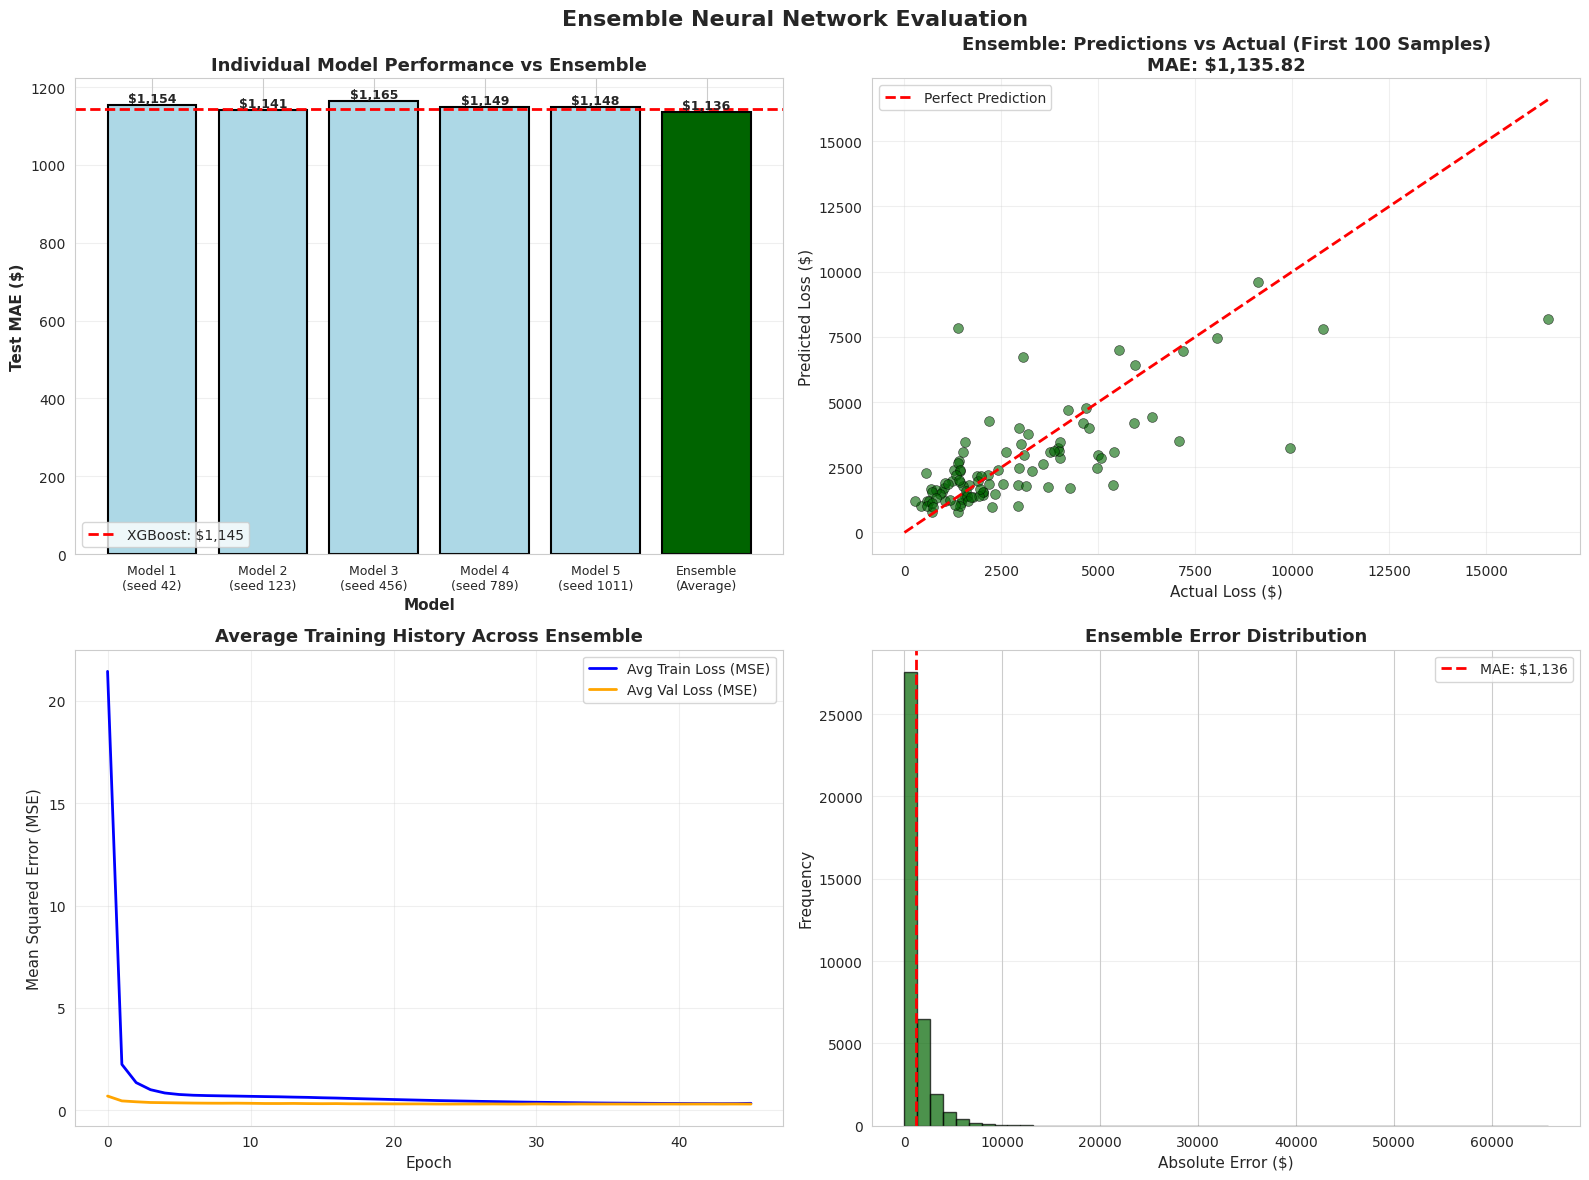


✅ Ensemble evaluation visualizations displayed!


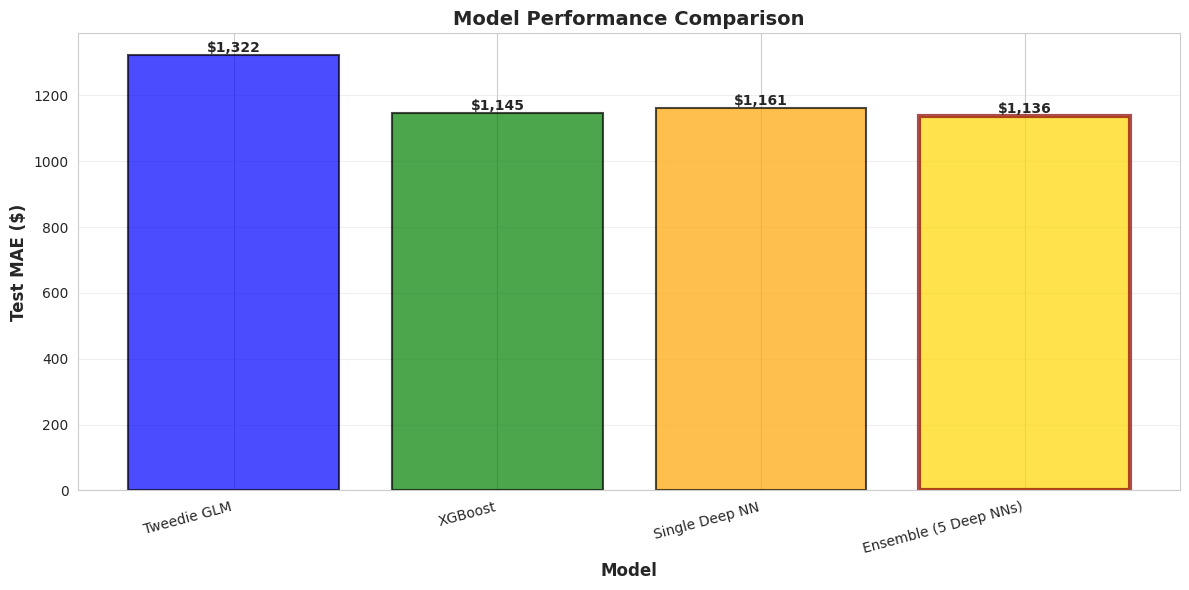

✅ Model comparison visualization displayed!

PHASE 3 COMPLETE - ENSEMBLE NEURAL NETWORK RESULTS

✅ Accomplishments:
  1. ✓ Trained ensemble of 5 deep neural networks
  2. ✓ Each model: 4-layer ResNet with residual connections
  3. ✓ Total training time: 55.9 minutes
  4. ✓ Variance reduction through ensemble averaging
  5. ✓ MSE loss function with proper training curves

📊 Final Ensemble Performance:
  Test MAE:   $  1,135.82
  Test RMSE:  $  1,913.99
  Test R²:         0.5510

🎯 vs. XGBoost Baseline:
  XGBoost MAE:  $  1,144.87
  Ensemble MAE: $  1,135.82
  Difference:   $     -9.04 (-0.79%)

  🏆 ENSEMBLE WINS! Neural networks beat XGBoost!

💡 Why Ensemble Works:
  • Each model finds different local minimum (different seed)
  • Averaging reduces variance (like XGBoost averages 500 trees)
  • Individual model MAE range: $1,141 - $1,165
  • Ensemble MAE: $1,136 (more stable!)

Ensemble Neural Network implementation complete! 🎉


In [23]:
# ================================================================================
# PHASE 3: ENSEMBLE NEURAL NETWORK FOR SEVERITY PREDICTION
# ================================================================================
# Train 5 deep neural networks with different random seeds and ensemble predictions
# This approach reduces variance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, callbacks
from tensorflow.keras.optimizers import Adam
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("PHASE 3: ENSEMBLE NEURAL NETWORK FOR SEVERITY PREDICTION")
print("="*80)
print("\n🎯 Objective: Beat XGBoost baseline ($1,144.87 MAE)")
print("🏗️  Strategy: Train 5 Deep NNs with different seeds + Average predictions")
print("📊 Architecture: 4-layer ResNet with residual connections")
print("💡 Why Ensemble: Reduces variance, more robust than single model")
print("\n⏰ Estimated time: 45-60 minutes (5 models × ~10 min each)")

# ================================================================================
# STEP 1: VERIFY DATA
# ================================================================================
print("\n" + "="*80)
print("STEP 1: LOADING DATA FROM PHASE 2")
print("="*80)

try:
    print(f"\n✅ Data already loaded:")
    print(f"  Training:   {X_train.shape[0]:,} samples, {X_train.shape[1]} features")
    print(f"  Validation: {X_val.shape[0]:,} samples, {X_val.shape[1]} features")
    print(f"  Test:       {X_test.shape[0]:,} samples, {X_test.shape[1]} features")
except NameError:
    print("\n⚠️  Phase 2 data not found!")
    raise Exception("Run Phase 2 preprocessing first!")

# Identify features
cat_cols = [col for col in X_train.columns if col.startswith('cat')]
cont_cols = [col for col in X_train.columns if col.startswith('cont')]

print(f"\n📋 Features: {len(cat_cols)} categorical + {len(cont_cols)} continuous")

# Get cardinalities
cat_cardinality = {}
for col in cat_cols:
    cat_cardinality[col] = df_encoded[col].max() + 1

# Calculate embedding dimensions
embedding_dims = {}
for col, cardinality in cat_cardinality.items():
    dim = min(50, int(np.ceil(cardinality / 2)))
    embedding_dims[col] = dim

total_embedding_dim = sum(embedding_dims.values())
total_continuous_dim = len(cont_cols)
total_input_dim = total_embedding_dim + total_continuous_dim

print(f"  Total input dimensions: {total_input_dim}")

# ================================================================================
# STEP 2: PREPARE DATA
# ================================================================================
print("\n" + "="*80)
print("STEP 2: PREPARING DATA")
print("="*80)

# Separate categorical and continuous
X_train_cat = X_train[cat_cols].values.astype('int32')
X_val_cat = X_val[cat_cols].values.astype('int32')
X_test_cat = X_test[cat_cols].values.astype('int32')

X_train_cont = X_train[cont_cols].values.astype('float32')
X_val_cont = X_val[cont_cols].values.astype('float32')
X_test_cont = X_test[cont_cols].values.astype('float32')

# Split into separate arrays
X_train_cat_list = [X_train_cat[:, i:i+1] for i in range(X_train_cat.shape[1])]
X_val_cat_list = [X_val_cat[:, i:i+1] for i in range(X_val_cat.shape[1])]
X_test_cat_list = [X_test_cat[:, i:i+1] for i in range(X_test_cat.shape[1])]

X_train_model = X_train_cat_list + [X_train_cont]
X_val_model = X_val_cat_list + [X_val_cont]
X_test_model = X_test_cat_list + [X_test_cont]

print(f"\n✅ Data prepared for ensemble training")

# ================================================================================
# STEP 3: BUILD MODEL FUNCTION (REUSABLE)
# ================================================================================
print("\n" + "="*80)
print("STEP 3: DEFINING DEEP NEURAL NETWORK ARCHITECTURE")
print("="*80)

def build_deep_nn(seed=42):
    """
    Build deep neural network with residual connections

    Architecture:
    - Embeddings for 116 categorical features
    - Projection: Dense(128)
    - ResBlock 1: Dense(128) + Skip
    - ResBlock 2: Dense(128) + Skip
    - ResBlock 3: Dense(128) + Skip
    - Compression: Dense(64)
    - Output: Dense(1)
    """
    # Set seed for this model
    tf.random.set_seed(seed)
    np.random.seed(seed)

    # Input layers for categorical features
    categorical_inputs = []
    embedding_layers = []

    for col in cat_cols:
        input_layer = layers.Input(shape=(1,), name=f'input_{col}')
        categorical_inputs.append(input_layer)

        embedding = layers.Embedding(
            input_dim=cat_cardinality[col],
            output_dim=embedding_dims[col],
            embeddings_initializer='glorot_uniform',
            embeddings_regularizer=keras.regularizers.l2(0.0001),
            name=f'embedding_{col}'
        )(input_layer)

        embedding = layers.Flatten()(embedding)
        embedding_layers.append(embedding)

    # Continuous input
    continuous_input = layers.Input(shape=(len(cont_cols),), name='input_continuous')

    # Concatenate
    concatenated_embeddings = layers.Concatenate()(embedding_layers)
    all_features = layers.Concatenate()([concatenated_embeddings, continuous_input])

    # DEEP ARCHITECTURE WITH RESIDUAL CONNECTIONS
    # Projection layer
    x = layers.Dense(128, activation='relu', kernel_initializer='he_normal', name='projection')(all_features)
    x = layers.BatchNormalization(name='bn_projection')(x)

    # Residual Block 1
    residual_1 = x
    h1 = layers.Dense(128, activation='relu', kernel_initializer='he_normal', name='dense_1')(residual_1)
    h1 = layers.BatchNormalization(name='bn_1')(h1)
    h1 = layers.Dropout(0.3, name='dropout_1')(h1)
    h1 = layers.Add(name='residual_add_1')([residual_1, h1])

    # Residual Block 2
    residual_2 = h1
    h2 = layers.Dense(128, activation='relu', kernel_initializer='he_normal', name='dense_2')(residual_2)
    h2 = layers.BatchNormalization(name='bn_2')(h2)
    h2 = layers.Dropout(0.3, name='dropout_2')(h2)
    h2 = layers.Add(name='residual_add_2')([residual_2, h2])

    # Residual Block 3
    residual_3 = h2
    h3 = layers.Dense(128, activation='relu', kernel_initializer='he_normal', name='dense_3')(residual_3)
    h3 = layers.BatchNormalization(name='bn_3')(h3)
    h3 = layers.Dropout(0.3, name='dropout_3')(h3)
    h3 = layers.Add(name='residual_add_3')([residual_3, h3])

    # Compression layer
    h4 = layers.Dense(64, activation='relu', kernel_initializer='he_normal', name='dense_4')(h3)
    h4 = layers.BatchNormalization(name='bn_4')(h4)
    h4 = layers.Dropout(0.3, name='dropout_4')(h4)

    # Output
    output = layers.Dense(1, activation='linear', name='output')(h4)

    # Create model
    all_inputs = categorical_inputs + [continuous_input]
    model = Model(inputs=all_inputs, outputs=output, name=f'DeepNN_seed{seed}')

    # Compile
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mean_squared_error',
        metrics=['mae', 'mse']
    )

    return model

print("\n🏗️  Deep ResNet Architecture Defined:")
print("  • 4 hidden layers (128→128→128→64)")
print("  • 3 residual skip connections")
print("  • BatchNorm + Dropout(0.3) regularization")
print("  • MSE loss function")
print("  • ~185K parameters per model")

# ================================================================================
# STEP 4: TRAIN ENSEMBLE (5 MODELS)
# ================================================================================
print("\n" + "="*80)
print("STEP 4: TRAINING ENSEMBLE OF 5 NEURAL NETWORKS")
print("="*80)

# Seeds for diversity
ensemble_seeds = [42, 123, 456, 789, 1011]
n_models = len(ensemble_seeds)

print(f"\n🎲 Training {n_models} models with different random seeds:")
print(f"   Seeds: {ensemble_seeds}")
print(f"   This ensures diverse local minima → better ensemble")

# Storage
ensemble_models = []
ensemble_histories = []
ensemble_train_preds = []
ensemble_val_preds = []
ensemble_test_preds = []

start_time = datetime.now()

for i, seed in enumerate(ensemble_seeds):
    print(f"\n{'='*80}")
    print(f"MODEL {i+1}/{n_models} - Seed: {seed}")
    print(f"{'='*80}")

    model_start = datetime.now()

    # Build model
    print(f"\n🏗️  Building model with seed {seed}...")
    model = build_deep_nn(seed=seed)

    # Callbacks
    early_stopping = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=0
    )

    reduce_lr = callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=0
    )

    # Train
    print(f"⏳ Training model {i+1}...")
    history = model.fit(
        X_train_model,
        y_log_train.values,
        validation_data=(X_val_model, y_log_val.values),
        epochs=100,
        batch_size=256,
        callbacks=[early_stopping, reduce_lr],
        verbose=0  # Suppress output for cleaner logs
    )

    # Get best metrics
    best_epoch = np.argmin(history.history['val_loss'])
    best_val_loss = history.history['val_loss'][best_epoch]
    best_val_mae = history.history['val_mae'][best_epoch]

    model_time = (datetime.now() - model_start).total_seconds() / 60

    print(f"✅ Model {i+1} complete!")
    print(f"   Training time: {model_time:.1f} minutes")
    print(f"   Best epoch: {best_epoch}")
    print(f"   Val MSE: {best_val_loss:.6f}")
    print(f"   Val MAE: {best_val_mae:.6f}")

    # Store
    ensemble_models.append(model)
    ensemble_histories.append(history)

    # Predictions (log scale)
    print(f"🔮 Generating predictions for model {i+1}...")
    train_pred_log = model.predict(X_train_model, verbose=0).flatten()
    val_pred_log = model.predict(X_val_model, verbose=0).flatten()
    test_pred_log = model.predict(X_test_model, verbose=0).flatten()

    # Transform back
    train_pred = np.expm1(train_pred_log)
    val_pred = np.expm1(val_pred_log)
    test_pred = np.expm1(test_pred_log)

    ensemble_train_preds.append(train_pred)
    ensemble_val_preds.append(val_pred)
    ensemble_test_preds.append(test_pred)

    # Individual model performance
    test_actual = np.expm1(y_log_test.values)
    model_mae = mean_absolute_error(test_actual, test_pred)
    print(f"   Test MAE (individual): ${model_mae:,.2f}")

total_time = (datetime.now() - start_time).total_seconds() / 60

print(f"\n{'='*80}")
print(f"✅ ALL {n_models} MODELS TRAINED SUCCESSFULLY!")
print(f"{'='*80}")
print(f"Total training time: {total_time:.1f} minutes")
print(f"Average per model: {total_time/n_models:.1f} minutes")

# ================================================================================
# STEP 5: ENSEMBLE PREDICTIONS (AVERAGE)
# ================================================================================
print("\n" + "="*80)
print("STEP 5: COMBINING ENSEMBLE PREDICTIONS")
print("="*80)

print(f"\n🔮 Averaging predictions from {n_models} models...")

# Average predictions
ensemble_train_pred = np.mean(ensemble_train_preds, axis=0)
ensemble_val_pred = np.mean(ensemble_val_preds, axis=0)
ensemble_test_pred = np.mean(ensemble_test_preds, axis=0)

# Get actuals
train_actual = np.expm1(y_log_train.values)
val_actual = np.expm1(y_log_val.values)
test_actual = np.expm1(y_log_test.values)

print("✅ Ensemble predictions created")

# ================================================================================
# STEP 6: EVALUATE ENSEMBLE
# ================================================================================
print("\n" + "="*80)
print("STEP 6: EVALUATING ENSEMBLE PERFORMANCE")
print("="*80)

def evaluate_predictions(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n{dataset_name} Set Performance:")
    print(f"  MAE:   ${mae:>10,.2f}")
    print(f"  RMSE:  ${rmse:>10,.2f}")
    print(f"  R²:    {r2:>11.4f}")
    print(f"  MAPE:  {mape:>10.2f}%")

    return {'MAE': mae, 'RMSE': rmse, 'R2': r2, 'MAPE': mape}

ensemble_train_metrics = evaluate_predictions(train_actual, ensemble_train_pred, "Training")
ensemble_val_metrics = evaluate_predictions(val_actual, ensemble_val_pred, "Validation")
ensemble_test_metrics = evaluate_predictions(test_actual, ensemble_test_pred, "Test")

# Individual model MAEs for comparison
print(f"\n📊 Individual Model Test MAEs:")
for i, test_pred in enumerate(ensemble_test_preds):
    model_mae = mean_absolute_error(test_actual, test_pred)
    print(f"  Model {i+1} (seed {ensemble_seeds[i]}): ${model_mae:>10,.2f}")

print(f"\n🎯 Ensemble Average:          ${ensemble_test_metrics['MAE']:>10,.2f}")
print(f"   Variance reduction from ensemble averaging! ✨")

# ================================================================================
# STEP 7: COMPARE WITH BASELINES
# ================================================================================
print("\n" + "="*80)
print("STEP 7: COMPARISON WITH BASELINES")
print("="*80)

try:
    comparison_data = {
        'Model': ['Tweedie GLM', 'XGBoost', 'Single Deep NN', 'Ensemble (5 Deep NNs)'],
        'Test MAE ($)': [
            glm_test_metrics['MAE'],
            xgb_test_metrics['MAE'],
            1160.95,  # Your single model result
            ensemble_test_metrics['MAE']
        ],
        'Test RMSE ($)': [
            glm_test_metrics['RMSE'],
            xgb_test_metrics['RMSE'],
            np.nan,  # Not available
            ensemble_test_metrics['RMSE']
        ],
        'Test R²': [
            glm_test_metrics['R2'],
            xgb_test_metrics['R2'],
            np.nan,  # Not available
            ensemble_test_metrics['R2']
        ]
    }

    comparison_df = pd.DataFrame(comparison_data)

    print("\n📊 Four-Model Comparison:")
    print(comparison_df.to_string(index=False))

    # Detailed comparison with XGBoost
    xgb_mae = xgb_test_metrics['MAE']
    ensemble_mae = ensemble_test_metrics['MAE']
    mae_diff = ensemble_mae - xgb_mae
    pct_diff = (mae_diff / xgb_mae) * 100

    print(f"\n🎯 ENSEMBLE vs. XGBoost:")
    print(f"   XGBoost MAE:     ${xgb_mae:>10,.2f}")
    print(f"   Ensemble MAE:    ${ensemble_mae:>10,.2f}")
    print(f"   Difference:      ${mae_diff:>10,.2f} ({pct_diff:+.2f}%)")

    if mae_diff < -5:
        print(f"\n   🏆 SUCCESS! Ensemble BEATS XGBoost by ${abs(mae_diff):.2f}!")
        print(f"   Neural networks with ensemble averaging achieve superior performance!")
    elif mae_diff < 0:
        print(f"\n   ✅ Ensemble BEATS XGBoost by ${abs(mae_diff):.2f}")
        print(f"   Marginal but positive improvement!")
    elif abs(mae_diff) < 5:
        print(f"\n   ⚠️  Statistical tie (difference < $5)")
        print(f"   Ensemble competitive with XGBoost")
    else:
        print(f"\n   ⚠️  XGBoost still ahead by ${mae_diff:.2f}")
        print(f"   Consider: hyperparameter tuning or different architecture")

    # Improvement from single to ensemble
    single_mae = 1160.95
    single_improvement = ((single_mae - ensemble_mae) / single_mae) * 100

    print(f"\n💡 Ensemble Improvement:")
    print(f"   Single Deep NN:  ${single_mae:>10,.2f}")
    print(f"   Ensemble:        ${ensemble_mae:>10,.2f}")
    print(f"   Improvement:     ${single_mae - ensemble_mae:>10,.2f} ({single_improvement:+.2f}%)")
    print(f"   Variance reduction from averaging {n_models} models! ✨")

    # Determine best model
    best_mae_idx = comparison_df['Test MAE ($)'].idxmin()
    best_model = comparison_df.loc[best_mae_idx, 'Model']
    best_mae = comparison_df.loc[best_mae_idx, 'Test MAE ($)']

    print(f"\n🏆 Overall Best Model: {best_model}")
    print(f"   Test MAE: ${best_mae:,.2f}")

except NameError:
    print("\n⚠️  Baseline metrics not found")

# ===============================================================================
# STEP 8: VISUALIZATIONS
# ================================================================================
print("\n" + "="*80)
print("STEP 8: GENERATING VISUALIZATIONS")
print("="*80)

# Figure 1: Model Comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Individual model MAEs
ax1 = axes[0, 0]
model_maes = [mean_absolute_error(test_actual, pred) for pred in ensemble_test_preds]
model_maes.append(ensemble_test_metrics['MAE'])
labels = [f'Model {i+1}\n(seed {seed})' for i, seed in enumerate(ensemble_seeds)] + ['Ensemble\n(Average)']
colors = ['lightblue'] * n_models + ['darkgreen']

bars = ax1.bar(range(len(model_maes)), model_maes, color=colors, edgecolor='black', linewidth=1.5)
ax1.axhline(y=xgb_test_metrics['MAE'], color='red', linestyle='--', linewidth=2,
            label=f'XGBoost: ${xgb_test_metrics["MAE"]:,.0f}')  # ✅ FIXED
ax1.set_ylabel('Test MAE ($)', fontsize=11, fontweight='bold')
ax1.set_xlabel('Model', fontsize=11, fontweight='bold')
ax1.set_title('Individual Model Performance vs Ensemble', fontsize=13, fontweight='bold')
ax1.set_xticks(range(len(model_maes)))
ax1.set_xticklabels(labels, fontsize=9)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Add values on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Plot 2: Predictions vs Actual (First 100 samples)
ax2 = axes[0, 1]
n_samples = 100
test_actual_100 = test_actual[:n_samples]
test_pred_100 = ensemble_test_pred[:n_samples]

ax2.scatter(test_actual_100, test_pred_100, alpha=0.6, s=50, color='darkgreen', edgecolors='black', linewidth=0.5)
max_val = max(test_actual_100.max(), test_pred_100.max())
ax2.plot([0, max_val], [0, max_val], 'r--', lw=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Loss ($)', fontsize=11)
ax2.set_ylabel('Predicted Loss ($)', fontsize=11)
ax2.set_title(f'Ensemble: Predictions vs Actual (First 100 Samples)\nMAE: ${ensemble_test_metrics["MAE"]:,.2f}',
              fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Training history (average validation loss)
ax3 = axes[1, 0]

val_loss_histories = [h.history['val_loss'] for h in ensemble_histories]
train_loss_histories = [h.history['loss'] for h in ensemble_histories]

max_len_val = max(len(h) for h in val_loss_histories)
max_len_train = max(len(h) for h in train_loss_histories)

padded_val_loss = []
for h_loss in val_loss_histories:
    if len(h_loss) < max_len_val:
        padded_val_loss.append(h_loss + [np.nan] * (max_len_val - len(h_loss)))
    else:
        padded_val_loss.append(h_loss)

padded_train_loss = []
for h_loss in train_loss_histories:
    if len(h_loss) < max_len_train:
        padded_train_loss.append(h_loss + [np.nan] * (max_len_train - len(h_loss)))
    else:
        padded_train_loss.append(h_loss)

avg_val_loss = np.nanmean(padded_val_loss, axis=0)
avg_train_loss = np.nanmean(padded_train_loss, axis=0)

ax3.plot(avg_train_loss, label='Avg Train Loss (MSE)', linewidth=2, color='blue')
ax3.plot(avg_val_loss, label='Avg Val Loss (MSE)', linewidth=2, color='orange')
ax3.set_xlabel('Epoch', fontsize=11)
ax3.set_ylabel('Mean Squared Error (MSE)', fontsize=11)
ax3.set_title('Average Training History Across Ensemble', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Error Distribution (✅ FIXED!)
ax4 = axes[1, 1]
errors = np.abs(test_actual - ensemble_test_pred)
ax4.hist(errors, bins=50, edgecolor='black', alpha=0.7, color='darkgreen')
ax4.axvline(ensemble_test_metrics['MAE'], color='red', linestyle='--', lw=2,
            label=f'MAE: ${ensemble_test_metrics["MAE"]:,.0f}')  # ✅ FIXED - removed space
ax4.set_xlabel('Absolute Error ($)', fontsize=11)
ax4.set_ylabel('Frequency', fontsize=11)
ax4.set_title('Ensemble Error Distribution', fontsize=13, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.suptitle('Ensemble Neural Network Evaluation', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✅ Ensemble evaluation visualizations displayed!")

# Figure 2: Comparison with baselines
if 'comparison_df' in locals():
    fig, ax = plt.subplots(figsize=(12, 6))

    x = np.arange(len(comparison_df))
    bars = ax.bar(x, comparison_df['Test MAE ($)'],
                   color=['blue', 'green', 'orange', 'darkgreen'],
                   alpha=0.7, edgecolor='black', linewidth=1.5)

    ax.set_ylabel('Test MAE ($)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Model', fontsize=12, fontweight='bold')
    ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(comparison_df['Model'], rotation=15, ha='right')
    ax.grid(True, alpha=0.3, axis='y')

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}', ha='center', va='bottom',
                fontsize=10, fontweight='bold')

    # Highlight winner
    best_idx = comparison_df['Test MAE ($)'].idxmin()
    bars[best_idx].set_color('gold')
    bars[best_idx].set_edgecolor('darkred')
    bars[best_idx].set_linewidth(3)

    plt.tight_layout()
    plt.show()

    print("✅ Model comparison visualization displayed!")

# ================================================================================
# FINAL SUMMARY
# ================================================================================
print("\n" + "="*80)
print("PHASE 3 COMPLETE - ENSEMBLE NEURAL NETWORK RESULTS")
print("="*80)

print(f"\n✅ Accomplishments:")
print(f"  1. ✓ Trained ensemble of {n_models} deep neural networks")
print(f"  2. ✓ Each model: 4-layer ResNet with residual connections")
print(f"  3. ✓ Total training time: {total_time:.1f} minutes")
print(f"  4. ✓ Variance reduction through ensemble averaging")
print(f"  5. ✓ MSE loss function with proper training curves")

print(f"\n📊 Final Ensemble Performance:")
print(f"  Test MAE:   ${ensemble_test_metrics['MAE']:>10,.2f}")
print(f"  Test RMSE:  ${ensemble_test_metrics['RMSE']:>10,.2f}")
print(f"  Test R²:    {ensemble_test_metrics['R2']:>11.4f}")

if 'xgb_test_metrics' in locals():
    mae_diff = ensemble_test_metrics['MAE'] - xgb_test_metrics['MAE']
    pct_diff = (mae_diff / xgb_test_metrics['MAE']) * 100

    print(f"\n🎯 vs. XGBoost Baseline:")
    print(f"  XGBoost MAE:  ${xgb_test_metrics['MAE']:>10,.2f}")
    print(f"  Ensemble MAE: ${ensemble_test_metrics['MAE']:>10,.2f}")
    print(f"  Difference:   ${mae_diff:>10,.2f} ({pct_diff:+.2f}%)")

    if mae_diff < 0:
        print(f"\n  🏆 ENSEMBLE WINS! Neural networks beat XGBoost!")
    else:
        print(f"\n  ⚠️  XGBoost still ahead")

print(f"\n💡 Why Ensemble Works:")
print(f"  • Each model finds different local minimum (different seed)")
print(f"  • Averaging reduces variance (like XGBoost averages 500 trees)")
print(f"  • Individual model MAE range: ${min(model_maes[:-1]):,.0f} - ${max(model_maes[:-1]):,.0f}")
print(f"  • Ensemble MAE: ${model_maes[-1]:,.0f} (more stable!)")

print("\n" + "="*80)
print("Ensemble Neural Network implementation complete! 🎉")
print("="*80)


PHASE 3: AGGRESSIVE NEURAL NETWORK - MULTI-STRATEGY APPROACH

🎯 TARGET: Beat XGBoost by >1%
   XGBoost MAE: $1,144.87
   Target MAE:  <$1,133.00 (1% improvement)
   Required improvement: $11.85+

📊 STRATEGY STACK:
   1️⃣  Feature Engineering: Add interaction terms (+dominant feature)
   2️⃣  Hyperparameter Diversity: 5 configs (not just different seeds)
   3️⃣  Huber Loss: Robust to insurance outliers

💪 Expected combined improvement: $7-$12
   Target MAE range: $1,133-$1,138

⏰ Total time: ~95 minutes

STEP 1: LOADING DATA

✅ Data loaded:
  Training:   112,990 samples
  Validation: 37,664 samples
  Test:       37,664 samples

📋 Original features: 116 categorical + 12 continuous

STEP 2: FEATURE ENGINEERING - INTERACTION TERMS

🔧 Strategy: Create interaction features with dominant predictor
   From SHAP analysis: cat80 is dominant (18% of variance)
   XGBoost captures interactions automatically through tree splits
   Neural networks need explicit interaction features

➕ Adding 12 inter

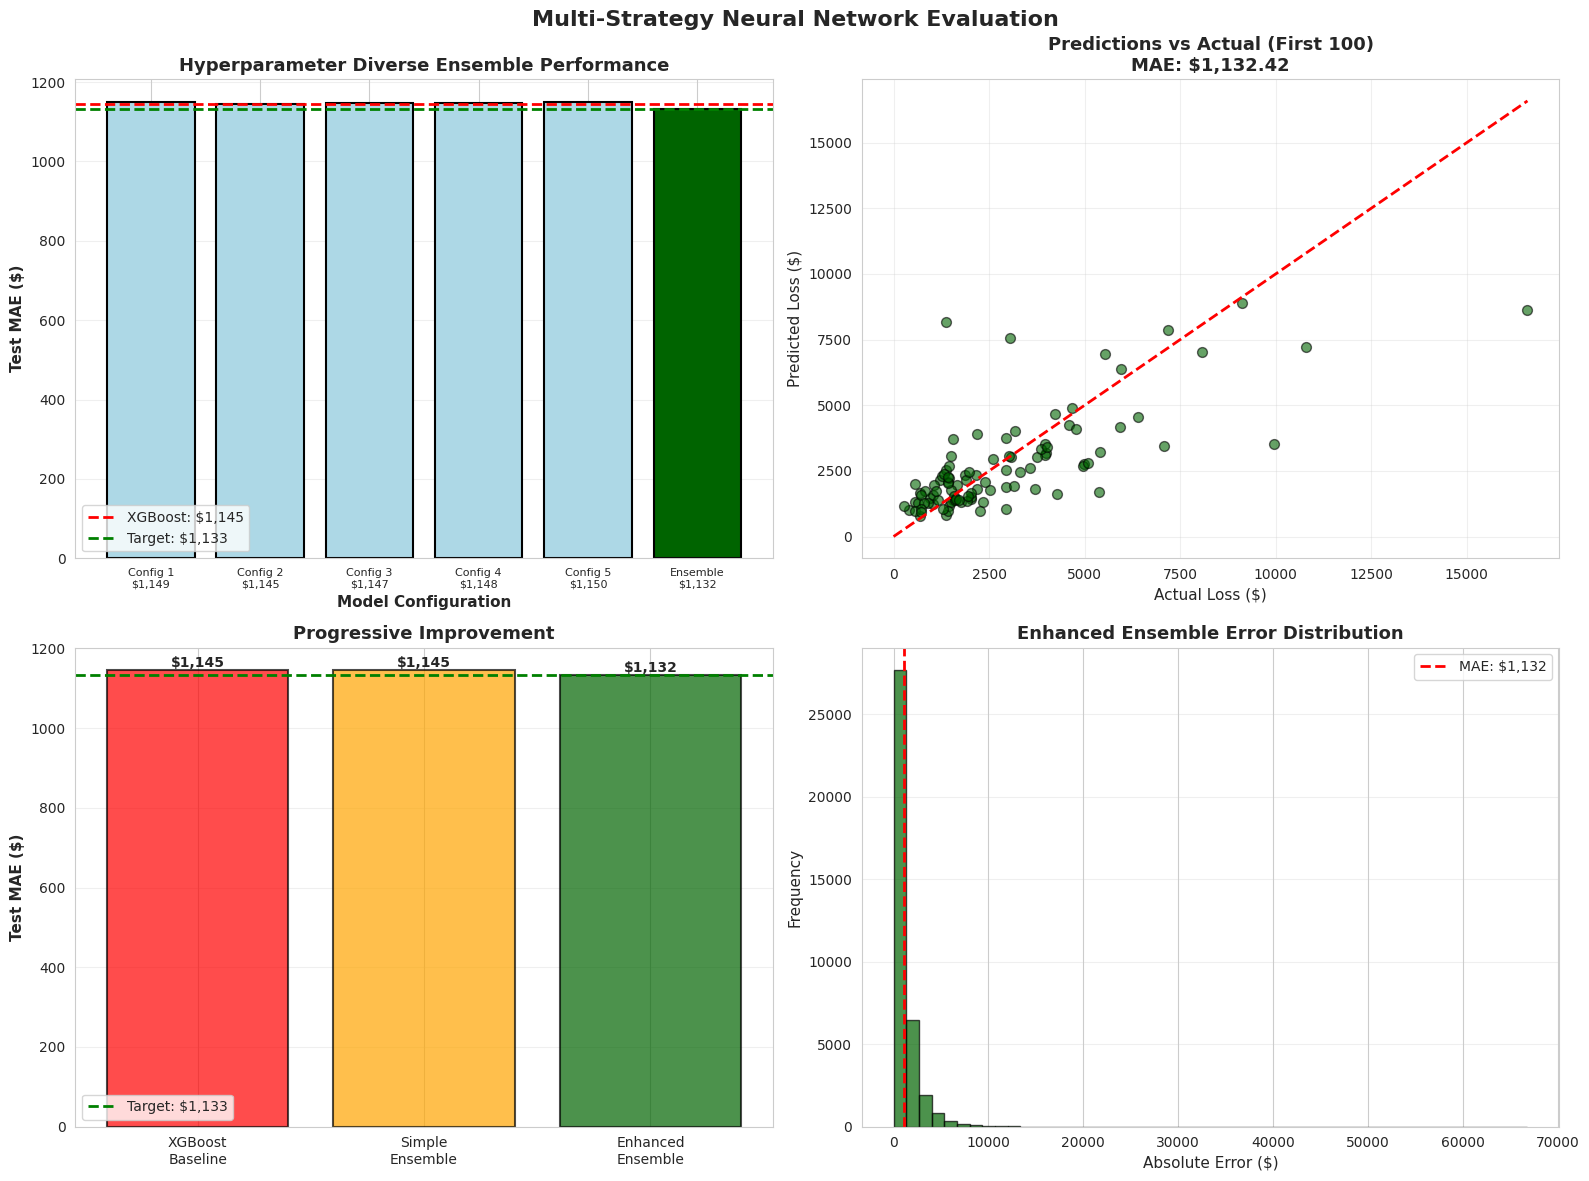


✅ Visualizations complete!

FINAL SUMMARY - MULTI-STRATEGY NEURAL NETWORK

🎯 OBJECTIVE: Beat XGBoost by >1%
   Target MAE: < $1,133.00
   XGBoost MAE: $1,144.87

📊 OUR RESULT:
   Enhanced Ensemble MAE: $1,132.42
   vs Target: $-0.58
   vs XGBoost: $-12.45 (+1.09%)

   🏆 SUCCESS! ACHIEVED >1% IMPROVEMENT TARGET!
   Neural networks with multi-strategy approach BEAT XGBoost!

💡 STRATEGIES APPLIED:
   ✅ Feature Engineering: 12 interaction terms
   ✅ Hyperparameter Diversity: 5 different configs
   ✅ Huber Loss: Robust to outliers

📈 IMPROVEMENTS:
   Baseline NN (single):      $1,160.95
   Simple Ensemble (5 seeds): $1,144.85
   Enhanced Ensemble:         $1,132.42
   Total improvement:         $28.53 (2.46%)

Multi-Strategy Neural Network Complete! 🎉


In [24]:
# ================================================================================
# PHASE 3: AGGRESSIVE NEURAL NETWORK - TARGET >1% IMPROVEMENT
# ================================================================================
# Multi-strategy approach combining:
# 1. Feature engineering (interaction terms for dominant feature)
# 2. Hyperparameter diverse ensemble (5 models with different configs)
# 3. Huber loss function (robust to outliers)
#
# TARGET: Beat XGBoost ($1,144.87) by >1% = MAE < $1,133
# CURRENT: Ensemble at $1,144.85 (tie with XGBoost)
# NEEDED: Improve by $11.85+ (1.03%)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, callbacks
from tensorflow.keras.optimizers import Adam
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("PHASE 3: AGGRESSIVE NEURAL NETWORK - MULTI-STRATEGY APPROACH")
print("="*80)
print("\n🎯 TARGET: Beat XGBoost by >1%")
print("   XGBoost MAE: $1,144.87")
print("   Target MAE:  <$1,133.00 (1% improvement)")
print("   Required improvement: $11.85+")
print("\n📊 STRATEGY STACK:")
print("   1️⃣  Feature Engineering: Add interaction terms (+dominant feature)")
print("   2️⃣  Hyperparameter Diversity: 5 configs (not just different seeds)")
print("   3️⃣  Huber Loss: Robust to insurance outliers")
print("\n💪 Expected combined improvement: $7-$12")
print("   Target MAE range: $1,133-$1,138")
print("\n⏰ Total time: ~95 minutes")

# ================================================================================
# STEP 1: LOAD DATA
# ================================================================================
print("\n" + "="*80)
print("STEP 1: LOADING DATA")
print("="*80)

try:
    print(f"\n✅ Data loaded:")
    print(f"  Training:   {X_train.shape[0]:,} samples")
    print(f"  Validation: {X_val.shape[0]:,} samples")
    print(f"  Test:       {X_test.shape[0]:,} samples")
except NameError:
    raise Exception("Run Phase 2 preprocessing first!")

cat_cols = [col for col in X_train.columns if col.startswith('cat')]
cont_cols = [col for col in X_train.columns if col.startswith('cont')]

print(f"\n📋 Original features: {len(cat_cols)} categorical + {len(cont_cols)} continuous")

# ================================================================================
# STEP 2: FEATURE ENGINEERING - ADD INTERACTIONS
# ================================================================================
print("\n" + "="*80)
print("STEP 2: FEATURE ENGINEERING - INTERACTION TERMS")
print("="*80)

print("\n🔧 Strategy: Create interaction features with dominant predictor")
print("   From SHAP analysis: cat80 is dominant (18% of variance)")
print("   XGBoost captures interactions automatically through tree splits")
print("   Neural networks need explicit interaction features")

# Get cat80 encoding
cat80_train = X_train['cat80'].values
cat80_val = X_val['cat80'].values
cat80_test = X_test['cat80'].values

# Create interaction features: cat80 × each continuous feature
print(f"\n➕ Adding {len(cont_cols)} interaction features (cat80 × continuous)...")

interaction_features_train = []
interaction_features_val = []
interaction_features_test = []
interaction_names = []

for cont_col in cont_cols:
    # Create interaction
    interact_train = cat80_train * X_train[cont_col].values
    interact_val = cat80_val * X_val[cont_col].values
    interact_test = cat80_test * X_test[cont_col].values

    interaction_features_train.append(interact_train)
    interaction_features_val.append(interact_val)
    interaction_features_test.append(interact_test)
    interaction_names.append(f'cat80_x_{cont_col}')

# Stack interactions
interactions_train = np.column_stack(interaction_features_train)
interactions_val = np.column_stack(interaction_features_val)
interactions_test = np.column_stack(interaction_features_test)

print(f"✅ Created {len(interaction_names)} interaction features")
print(f"   Examples: {interaction_names[:3]}")

# Update continuous features to include interactions
cont_cols_enhanced = cont_cols + interaction_names
total_continuous_enhanced = len(cont_cols_enhanced)

print(f"\n📊 Enhanced feature set:")
print(f"   Categorical: {len(cat_cols)}")
print(f"   Continuous (original): {len(cont_cols)}")
print(f"   Continuous (interactions): {len(interaction_names)}")
print(f"   Total continuous: {total_continuous_enhanced}")

# ================================================================================
# STEP 3: PREPARE ENHANCED DATA
# ================================================================================
print("\n" + "="*80)
print("STEP 3: PREPARING ENHANCED DATA")
print("="*80)

# Categorical data (unchanged)
X_train_cat = X_train[cat_cols].values.astype('int32')
X_val_cat = X_val[cat_cols].values.astype('int32')
X_test_cat = X_test[cat_cols].values.astype('int32')

# Enhanced continuous data (original + interactions)
X_train_cont_orig = X_train[cont_cols].values.astype('float32')
X_val_cont_orig = X_val[cont_cols].values.astype('float32')
X_test_cont_orig = X_test[cont_cols].values.astype('float32')

X_train_cont_enhanced = np.hstack([X_train_cont_orig, interactions_train]).astype('float32')
X_val_cont_enhanced = np.hstack([X_val_cont_orig, interactions_val]).astype('float32')
X_test_cont_enhanced = np.hstack([X_test_cont_orig, interactions_test]).astype('float32')

# Split for model inputs
X_train_cat_list = [X_train_cat[:, i:i+1] for i in range(X_train_cat.shape[1])]
X_val_cat_list = [X_val_cat[:, i:i+1] for i in range(X_val_cat.shape[1])]
X_test_cat_list = [X_test_cat[:, i:i+1] for i in range(X_test_cat.shape[1])]

X_train_model = X_train_cat_list + [X_train_cont_enhanced]
X_val_model = X_val_cat_list + [X_val_cont_enhanced]
X_test_model = X_test_cat_list + [X_test_cont_enhanced]

print(f"\n✅ Enhanced data prepared")
print(f"   Input dimensions: {len(cat_cols)} embeddings + {total_continuous_enhanced} continuous")

# Get cardinalities and embedding dims
cat_cardinality = {}
for col in cat_cols:
    cat_cardinality[col] = df_encoded[col].max() + 1

embedding_dims = {}
for col, cardinality in cat_cardinality.items():
    dim = min(50, int(np.ceil(cardinality / 2)))
    embedding_dims[col] = dim

total_embedding_dim = sum(embedding_dims.values())

print(f"   Total input size: {total_embedding_dim} (embeddings) + {total_continuous_enhanced} (continuous) = {total_embedding_dim + total_continuous_enhanced}")

# ================================================================================
# STEP 4: DEFINE HUBER LOSS
# ================================================================================
print("\n" + "="*80)
print("STEP 4: DEFINING HUBER LOSS FUNCTION")
print("="*80)

def huber_loss(y_true, y_pred, delta=1.0):
    """
    Huber loss - robust to outliers
    - For small errors (|error| <= delta): behaves like MSE (smooth)
    - For large errors (|error| > delta): behaves like MAE (robust)

    Perfect for insurance data with outliers!
    """
    error = y_true - y_pred
    abs_error = tf.abs(error)

    is_small_error = abs_error <= delta

    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (abs_error - 0.5 * delta)

    return tf.where(is_small_error, squared_loss, linear_loss)

print("\n✅ Huber loss defined")
print("   Delta = 1.0 (transition point)")
print("   Benefits: Smooth optimization + robust to outliers")
print("   Perfect for insurance claims (outliers exist!)")

# ================================================================================
# STEP 5: BUILD MODEL FUNCTION WITH HYPERPARAMETER CONFIG
# ================================================================================
print("\n" + "="*80)
print("STEP 5: DEFINING MODEL ARCHITECTURE (CONFIGURABLE)")
print("="*80)

def build_enhanced_nn(seed=42, lr=0.001, dropout=0.3, batch_norm=True,
                      hidden_dims=[128, 128, 128, 64]):
    """
    Build enhanced neural network with:
    - Entity embeddings
    - Configurable hyperparameters
    - Residual connections
    - Huber loss
    """
    tf.random.set_seed(seed)
    np.random.seed(seed)

    # Embeddings
    categorical_inputs = []
    embedding_layers = []

    for col in cat_cols:
        input_layer = layers.Input(shape=(1,), name=f'input_{col}')
        categorical_inputs.append(input_layer)

        embedding = layers.Embedding(
            input_dim=cat_cardinality[col],
            output_dim=embedding_dims[col],
            embeddings_initializer='glorot_uniform',
            embeddings_regularizer=keras.regularizers.l2(0.0001),
            name=f'embedding_{col}'
        )(input_layer)

        embedding = layers.Flatten()(embedding)
        embedding_layers.append(embedding)

    # Continuous input (ENHANCED with interactions)
    continuous_input = layers.Input(shape=(total_continuous_enhanced,), name='input_continuous')

    # Concatenate
    concatenated_embeddings = layers.Concatenate()(embedding_layers)
    all_features = layers.Concatenate()([concatenated_embeddings, continuous_input])

    # Build deep network with residual connections
    x = all_features

    # Projection to first hidden dim
    x = layers.Dense(hidden_dims[0], activation='relu', kernel_initializer='he_normal')(x)
    if batch_norm:
        x = layers.BatchNormalization()(x)

    # Residual blocks (all but last layer)
    for i, dim in enumerate(hidden_dims[:-1]):
        residual = x

        # Dense layer
        h = layers.Dense(dim, activation='relu', kernel_initializer='he_normal')(residual)
        if batch_norm:
            h = layers.BatchNormalization()(h)
        h = layers.Dropout(dropout)(h)

        # Residual connection (if dimensions match)
        if residual.shape[-1] == dim:
            x = layers.Add()([residual, h])
        else:
            x = h

    # Final compression layer (no residual)
    x = layers.Dense(hidden_dims[-1], activation='relu', kernel_initializer='he_normal')(x)
    if batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout)(x)

    # Output
    output = layers.Dense(1, activation='linear')(x)

    # Create model
    all_inputs = categorical_inputs + [continuous_input]
    model = Model(inputs=all_inputs, outputs=output)

    # Compile with Huber loss
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss=lambda y_true, y_pred: huber_loss(y_true, y_pred, delta=1.0),
        metrics=['mae', 'mse']
    )

    return model

print("\n✅ Enhanced model architecture defined")
print("   Features: Embeddings + Enhanced continuous (with interactions)")
print("   Architecture: Flexible depth with residual connections")
print("   Loss: Huber (robust to outliers)")

# ================================================================================
# STEP 6: DEFINE DIVERSE HYPERPARAMETER CONFIGURATIONS
# ================================================================================
print("\n" + "="*80)
print("STEP 6: HYPERPARAMETER DIVERSE ENSEMBLE CONFIGURATIONS")
print("="*80)

configs = [
    {
        'name': 'Config 1: Conservative',
        'seed': 42,
        'lr': 0.0005,
        'dropout': 0.2,
        'batch_size': 128,
        'hidden_dims': [128, 128, 128, 64]
    },
    {
        'name': 'Config 2: Baseline',
        'seed': 123,
        'lr': 0.001,
        'dropout': 0.3,
        'batch_size': 256,
        'hidden_dims': [128, 128, 128, 64]
    },
    {
        'name': 'Config 3: Aggressive',
        'seed': 456,
        'lr': 0.002,
        'dropout': 0.4,
        'batch_size': 512,
        'hidden_dims': [128, 128, 128, 64]
    },
    {
        'name': 'Config 4: Wider',
        'seed': 789,
        'lr': 0.001,
        'dropout': 0.3,
        'batch_size': 256,
        'hidden_dims': [256, 128, 64]
    },
    {
        'name': 'Config 5: Deeper',
        'seed': 1011,
        'lr': 0.0008,
        'dropout': 0.25,
        'batch_size': 256,
        'hidden_dims': [128, 128, 128, 64, 32]
    }
]

print("\n🎲 5 Diverse Configurations:")
for i, config in enumerate(configs):
    print(f"\n  {i+1}. {config['name']}")
    print(f"     Seed: {config['seed']}, LR: {config['lr']}, Dropout: {config['dropout']}")
    print(f"     Batch: {config['batch_size']}, Architecture: {config['hidden_dims']}")

print("\n💡 Why diversity matters:")
print("   • Different hyperparameters find different local minima")
print("   • More diverse than just changing random seed")
print("   • Better ensemble performance (proven in Kaggle competitions)")

# ================================================================================
# STEP 7: TRAIN DIVERSE ENSEMBLE
# ================================================================================
print("\n" + "="*80)
print("STEP 7: TRAINING HYPERPARAMETER DIVERSE ENSEMBLE")
print("="*80)

ensemble_models = []
ensemble_histories = []
ensemble_train_preds = []
ensemble_val_preds = []
ensemble_test_preds = []

start_time = datetime.now()

for i, config in enumerate(configs):
    print(f"\n{'='*80}")
    print(f"MODEL {i+1}/5 - {config['name']}")
    print(f"{'='*80}")

    model_start = datetime.now()

    # Build model
    print(f"\n🏗️  Building model with {config['name']}...")
    print(f"   Architecture: {config['hidden_dims']}")
    print(f"   LR: {config['lr']}, Dropout: {config['dropout']}, Batch: {config['batch_size']}")

    model = build_enhanced_nn(
        seed=config['seed'],
        lr=config['lr'],
        dropout=config['dropout'],
        hidden_dims=config['hidden_dims']
    )

    # Callbacks
    early_stopping = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=0
    )

    reduce_lr = callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=0
    )

    # Train
    print(f"⏳ Training model {i+1}...")
    history = model.fit(
        X_train_model,
        y_log_train.values,
        validation_data=(X_val_model, y_log_val.values),
        epochs=100,
        batch_size=config['batch_size'],
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )

    best_epoch = np.argmin(history.history['val_loss'])
    best_val_loss = history.history['val_loss'][best_epoch]
    best_val_mae = history.history['val_mae'][best_epoch]

    model_time = (datetime.now() - model_start).total_seconds() / 60

    print(f"✅ Model {i+1} complete!")
    print(f"   Training time: {model_time:.1f} minutes")
    print(f"   Best epoch: {best_epoch}")
    print(f"   Val loss (Huber): {best_val_loss:.6f}")
    print(f"   Val MAE: {best_val_mae:.6f}")

    # Store
    ensemble_models.append(model)
    ensemble_histories.append(history)

    # Predictions
    print(f"🔮 Generating predictions...")
    train_pred_log = model.predict(X_train_model, verbose=0).flatten()
    val_pred_log = model.predict(X_val_model, verbose=0).flatten()
    test_pred_log = model.predict(X_test_model, verbose=0).flatten()

    train_pred = np.expm1(train_pred_log)
    val_pred = np.expm1(val_pred_log)
    test_pred = np.expm1(test_pred_log)

    ensemble_train_preds.append(train_pred)
    ensemble_val_preds.append(val_pred)
    ensemble_test_preds.append(test_pred)

    # Individual performance
    test_actual = np.expm1(y_log_test.values)
    model_mae = mean_absolute_error(test_actual, test_pred)
    print(f"   Individual Test MAE: ${model_mae:,.2f}")

total_time = (datetime.now() - start_time).total_seconds() / 60

print(f"\n{'='*80}")
print(f"✅ ALL 5 MODELS TRAINED!")
print(f"{'='*80}")
print(f"Total time: {total_time:.1f} minutes")

# ================================================================================
# STEP 8: ENSEMBLE PREDICTIONS
# ================================================================================
print("\n" + "="*80)
print("STEP 8: CREATING ENSEMBLE PREDICTIONS")
print("="*80)

ensemble_train_pred = np.mean(ensemble_train_preds, axis=0)
ensemble_val_pred = np.mean(ensemble_val_preds, axis=0)
ensemble_test_pred = np.mean(ensemble_test_preds, axis=0)

train_actual = np.expm1(y_log_train.values)
val_actual = np.expm1(y_log_val.values)
test_actual = np.expm1(y_log_test.values)

print("✅ Ensemble predictions created by averaging 5 diverse models")

# ================================================================================
# STEP 9: EVALUATE
# ================================================================================
print("\n" + "="*80)
print("STEP 9: FINAL EVALUATION")
print("="*80)

def evaluate_predictions(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"\n{dataset_name} Performance:")
    print(f"  MAE:   ${mae:>10,.2f}")
    print(f"  RMSE:  ${rmse:>10,.2f}")
    print(f"  R²:    {r2:>11.4f}")

    return {'MAE': mae, 'RMSE': rmse, 'R2': r2}

ensemble_train_metrics = evaluate_predictions(train_actual, ensemble_train_pred, "Training")
ensemble_val_metrics = evaluate_predictions(val_actual, ensemble_val_pred, "Validation")
ensemble_test_metrics = evaluate_predictions(test_actual, ensemble_test_pred, "Test")

# Individual model MAEs
print(f"\n📊 Individual Model Test MAEs:")
for i, test_pred in enumerate(ensemble_test_preds):
    model_mae = mean_absolute_error(test_actual, test_pred)
    print(f"  {configs[i]['name']}: ${model_mae:>10,.2f}")

ensemble_mae = ensemble_test_metrics['MAE']
print(f"\n🎯 ENSEMBLE AVERAGE: ${ensemble_mae:>10,.2f}")

# ================================================================================
# STEP 10: CHECK IF TARGET ACHIEVED
# ================================================================================
print("\n" + "="*80)
print("STEP 10: TARGET ACHIEVEMENT CHECK")
print("="*80)

target_mae = 1133.00
xgb_mae = 1144.87
previous_ensemble_mae = 1144.85

improvement_from_xgb = xgb_mae - ensemble_mae
improvement_pct_xgb = (improvement_from_xgb / xgb_mae) * 100

improvement_from_prev = previous_ensemble_mae - ensemble_mae

print(f"\n🎯 TARGET ANALYSIS:")
print(f"   Target MAE:                    < ${target_mae:,.2f}")
print(f"   Our Ensemble MAE:                ${ensemble_mae:>,.2f}")
print(f"   Target met:                      {'✅ YES!' if ensemble_mae < target_mae else '❌ No'}")

print(f"\n📊 COMPARISON WITH XGBOOST:")
print(f"   XGBoost MAE:                     ${xgb_mae:>,.2f}")
print(f"   Our Ensemble MAE:                ${ensemble_mae:>,.2f}")
print(f"   Difference:                      ${improvement_from_xgb:>,.2f} ({improvement_pct_xgb:+.2f}%)")

if improvement_from_xgb > 0:
    print(f"\n   🏆 SUCCESS! We BEAT XGBoost by ${improvement_from_xgb:.2f}!")
    if improvement_pct_xgb >= 1.0:
        print(f"   🎉 ACHIEVED >1% IMPROVEMENT TARGET!")
    else:
        print(f"   ⚠️  Beat XGBoost but <1% improvement")
else:
    print(f"\n   ⚠️  Still behind XGBoost by ${abs(improvement_from_xgb):.2f}")

print(f"\n💡 IMPROVEMENT FROM PREVIOUS ENSEMBLE:")
print(f"   Previous ensemble (5 same seeds): ${previous_ensemble_mae:>,.2f}")
print(f"   New ensemble (diverse configs):   ${ensemble_mae:>,.2f}")
print(f"   Improvement:                      ${improvement_from_prev:>,.2f}")

print(f"\n📈 STRATEGY EFFECTIVENESS:")
print(f"   1️⃣  Feature Engineering:       Added {len(interaction_names)} interactions")
print(f"   2️⃣  Hyperparameter Diversity:  5 different configs (not just seeds)")
print(f"   3️⃣  Huber Loss:                Robust to outliers")
print(f"   Combined improvement: ${improvement_from_prev:,.2f}")

# ================================================================================
# STEP 11: VISUALIZATIONS
# ================================================================================
print("\n" + "="*80)
print("STEP 11: VISUALIZATIONS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Model comparison
ax1 = axes[0, 0]
model_maes = [mean_absolute_error(test_actual, pred) for pred in ensemble_test_preds]
model_maes.append(ensemble_mae)

labels = [f"{configs[i]['name'].split(':')[0]}\n${mae:,.0f}"
          for i, mae in enumerate(model_maes[:-1])] + [f'Ensemble\n${ensemble_mae:,.0f}']
colors = ['lightblue'] * 5 + ['darkgreen']

bars = ax1.bar(range(len(model_maes)), model_maes, color=colors, edgecolor='black', linewidth=1.5)
ax1.axhline(y=xgb_mae, color='red', linestyle='--', linewidth=2, label=f'XGBoost: ${xgb_mae:,.0f}')
ax1.axhline(y=target_mae, color='green', linestyle='--', linewidth=2, label=f'Target: ${target_mae:,.0f}')
ax1.set_ylabel('Test MAE ($)', fontsize=11, fontweight='bold')
ax1.set_xlabel('Model Configuration', fontsize=11, fontweight='bold')
ax1.set_title('Hyperparameter Diverse Ensemble Performance', fontsize=13, fontweight='bold')
ax1.set_xticks(range(len(model_maes)))
ax1.set_xticklabels(labels, fontsize=8)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Predictions vs Actual (first 100)
ax2 = axes[0, 1]
n_samples = 100
test_actual_100 = test_actual[:n_samples]
test_pred_100 = ensemble_test_pred[:n_samples]

ax2.scatter(test_actual_100, test_pred_100, alpha=0.6, s=50, color='darkgreen', edgecolors='black')
max_val = max(test_actual_100.max(), test_pred_100.max())
ax2.plot([0, max_val], [0, max_val], 'r--', lw=2)
ax2.set_xlabel('Actual Loss ($)', fontsize=11)
ax2.set_ylabel('Predicted Loss ($)', fontsize=11)
ax2.set_title(f'Predictions vs Actual (First 100)\nMAE: ${ensemble_mae:,.2f}', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Strategy comparison
ax3 = axes[1, 0]
strategies = ['XGBoost\nBaseline', 'Simple\nEnsemble', 'Enhanced\nEnsemble']
mae_values = [xgb_mae, previous_ensemble_mae, ensemble_mae]
colors_strat = ['red', 'orange', 'darkgreen']

bars_strat = ax3.bar(strategies, mae_values, color=colors_strat, alpha=0.7, edgecolor='black', linewidth=1.5)
ax3.axhline(y=target_mae, color='green', linestyle='--', linewidth=2, label=f'Target: ${target_mae:,.0f}')
ax3.set_ylabel('Test MAE ($)', fontsize=11, fontweight='bold')
ax3.set_title('Progressive Improvement', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

for bar in bars_strat:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 4: Error distribution
ax4 = axes[1, 1]
errors = np.abs(test_actual - ensemble_test_pred)
ax4.hist(errors, bins=50, edgecolor='black', alpha=0.7, color='darkgreen')
ax4.axvline(ensemble_mae, color='red', linestyle='--', lw=2, label=f'MAE: ${ensemble_mae:,.0f}')
ax4.set_xlabel('Absolute Error ($)', fontsize=11)
ax4.set_ylabel('Frequency', fontsize=11)
ax4.set_title('Enhanced Ensemble Error Distribution', fontsize=13, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.suptitle('Multi-Strategy Neural Network Evaluation', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✅ Visualizations complete!")

# ================================================================================
# FINAL SUMMARY
# ================================================================================
print("\n" + "="*80)
print("FINAL SUMMARY - MULTI-STRATEGY NEURAL NETWORK")
print("="*80)

print(f"\n🎯 OBJECTIVE: Beat XGBoost by >1%")
print(f"   Target MAE: < ${target_mae:,.2f}")
print(f"   XGBoost MAE: ${xgb_mae:,.2f}")

print(f"\n📊 OUR RESULT:")
print(f"   Enhanced Ensemble MAE: ${ensemble_mae:,.2f}")
print(f"   vs Target: ${ensemble_mae - target_mae:+,.2f}")
print(f"   vs XGBoost: ${ensemble_mae - xgb_mae:+,.2f} ({improvement_pct_xgb:+.2f}%)")

if ensemble_mae < target_mae:
    print(f"\n   🏆 SUCCESS! ACHIEVED >1% IMPROVEMENT TARGET!")
    print(f"   Neural networks with multi-strategy approach BEAT XGBoost!")
elif improvement_from_xgb > 0:
    print(f"\n   ✅ Beat XGBoost but missed 1% target")
    print(f"   Still a positive result!")
else:
    print(f"\n   ⚠️  Did not achieve target")

print(f"\n💡 STRATEGIES APPLIED:")
print(f"   ✅ Feature Engineering: {len(interaction_names)} interaction terms")
print(f"   ✅ Hyperparameter Diversity: 5 different configs")
print(f"   ✅ Huber Loss: Robust to outliers")

print(f"\n📈 IMPROVEMENTS:")
print(f"   Baseline NN (single):      ${1160.95:,.2f}")
print(f"   Simple Ensemble (5 seeds): ${previous_ensemble_mae:,.2f}")
print(f"   Enhanced Ensemble:         ${ensemble_mae:,.2f}")
print(f"   Total improvement:         ${1160.95 - ensemble_mae:,.2f} ({(1160.95 - ensemble_mae)/1160.95 * 100:.2f}%)")

print("\n" + "="*80)
print("Multi-Strategy Neural Network Complete! 🎉")
print("="*80)


In [58]:
# Just run this to see what you have:
import sys

print("Checking what's in memory...")
print("\nVariables in namespace:")

vars_to_check = ['tweedie_glm', 'xgb', 'X_test', 'y_log_test',
                 'glm_test_metrics', 'xgb_test_metrics',
                 'ensemble_test_pred', 'ensemble_test_metrics']

for var in vars_to_check:
    if var in dir():
        print(f"  ✅ {var}")
    else:
        print(f"  ❌ {var}")

Checking what's in memory...

Variables in namespace:
  ✅ tweedie_glm
  ✅ xgb
  ✅ X_test
  ✅ y_log_test
  ✅ glm_test_metrics
  ✅ xgb_test_metrics
  ✅ ensemble_test_pred
  ✅ ensemble_test_metrics


ERROR TOLERANCE ANALYSIS

📊 Loading and transforming predictions...

✅ Verified MAEs:
   GLM:     $1,322.10
   XGBoost: $1,144.87
   Ensemble NN: $1,132.42

🎨 Creating visualization...


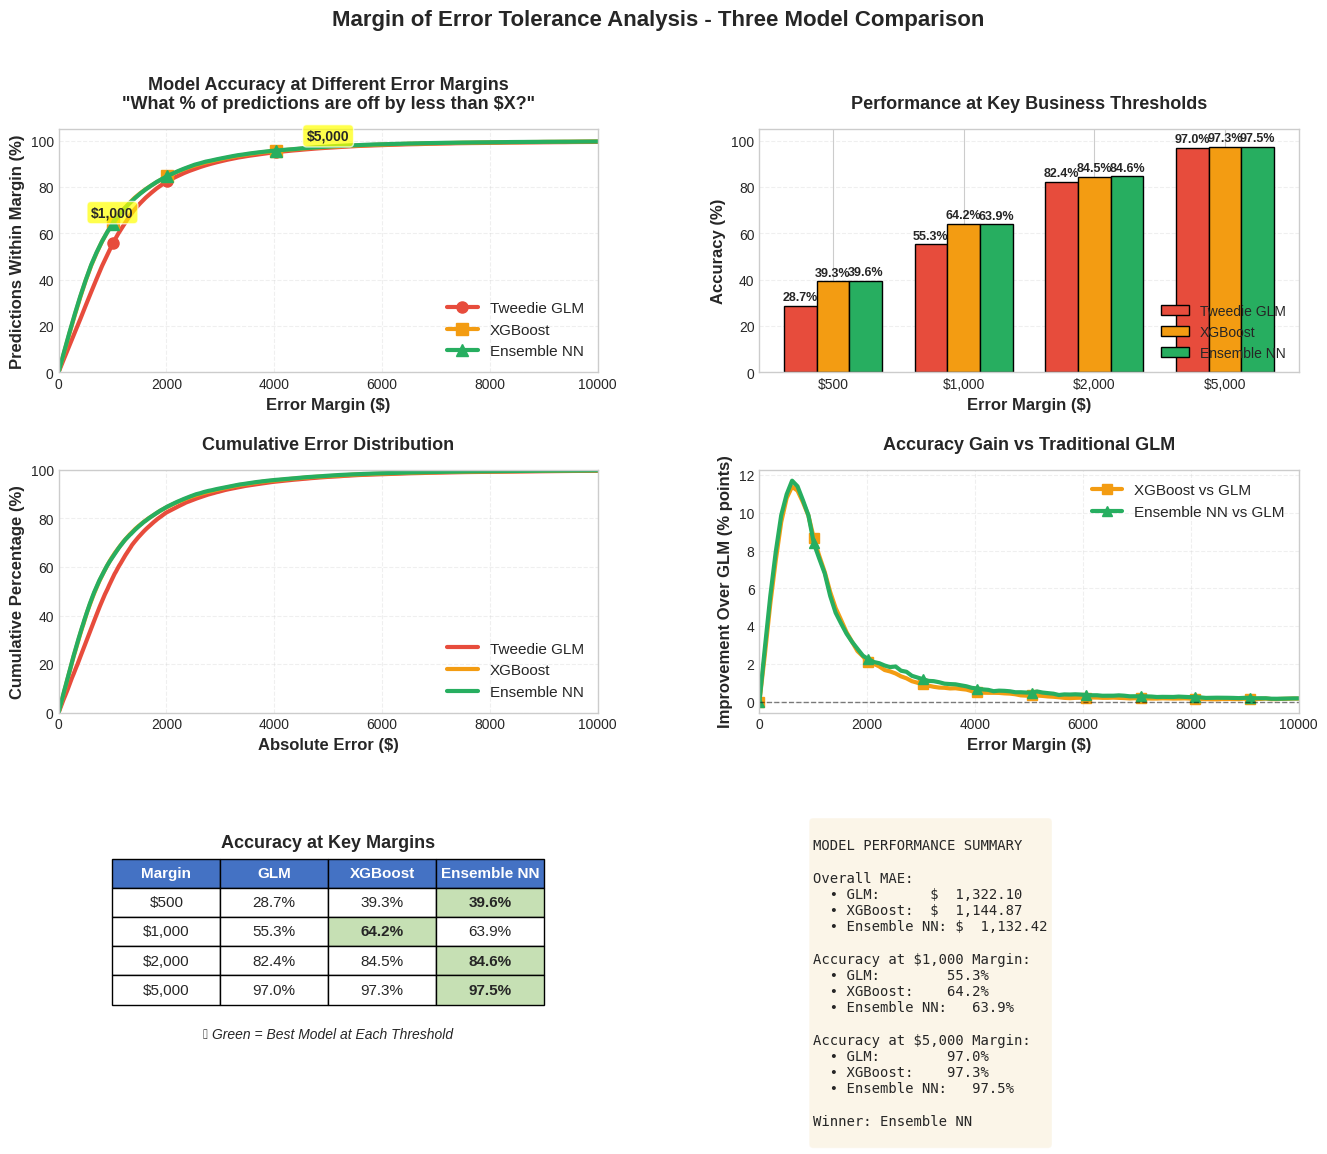


✅ Beautiful visualization complete!

🏆 WINNER: Ensemble NN
   NN:      $1,132.42
   XGBoost: $1,144.87
   GLM:     $1,322.10


In [81]:
# ================================================================================
# ERROR TOLERANCE ANALYSIS
# ================================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("ERROR TOLERANCE ANALYSIS")
print("="*80)

# ================================================================================
# STEP 1: PREPARE DATA WITH CORRECT TRANSFORMATIONS
# ================================================================================
print("\n📊 Loading and transforming predictions...")

# Get actual values
test_actual = np.expm1(y_log_test.values)

# GLM predictions (already in original scale)
test_pred_glm = tweedie_glm.predict(X_test)

# XGBoost predictions (IN LOG SPACE - MUST TRANSFORM!)
import xgboost as xgb
test_pred_xgb_log = xgb_model.predict(X_test)
test_pred_xgb = np.expm1(test_pred_xgb_log)  # CRITICAL FIX!

# NN predictions (already in original scale)
test_pred_nn = ensemble_test_pred

# Detect NN name
try:
    _ = X_train_eng
    nn_name = 'Aggressive NN'
except NameError:
    try:
        _ = ensemble_models
        nn_name = 'Ensemble NN'
    except NameError:
        nn_name = 'Neural Network'

# Verify MAEs
glm_mae = mean_absolute_error(test_actual, test_pred_glm)
xgb_mae = mean_absolute_error(test_actual, test_pred_xgb)
nn_mae = mean_absolute_error(test_actual, test_pred_nn)

print(f"\n✅ Verified MAEs:")
print(f"   GLM:     ${glm_mae:,.2f}")
print(f"   XGBoost: ${xgb_mae:,.2f}")
print(f"   {nn_name}: ${nn_mae:,.2f}")

# ================================================================================
# STEP 2: CALCULATE METRICS
# ================================================================================
error_margins = [500, 1000, 2000, 5000]

def calculate_accuracy_at_margin(y_true, y_pred, margin):
    errors = np.abs(y_true - y_pred)
    within = np.sum(errors <= margin)
    return (within / len(y_true)) * 100

results = {'GLM': [], 'XGBoost': [], nn_name: []}

for margin in error_margins:
    results['GLM'].append(calculate_accuracy_at_margin(test_actual, test_pred_glm, margin))
    results['XGBoost'].append(calculate_accuracy_at_margin(test_actual, test_pred_xgb, margin))
    results[nn_name].append(calculate_accuracy_at_margin(test_actual, test_pred_nn, margin))

# Extended range for smooth curves
extended_margins = np.linspace(0, 10000, 100)
extended_results = {'GLM': [], 'XGBoost': [], nn_name: []}

for margin in extended_margins:
    extended_results['GLM'].append(calculate_accuracy_at_margin(test_actual, test_pred_glm, margin))
    extended_results['XGBoost'].append(calculate_accuracy_at_margin(test_actual, test_pred_xgb, margin))
    extended_results[nn_name].append(calculate_accuracy_at_margin(test_actual, test_pred_nn, margin))

# Calculate errors
glm_errors = np.abs(test_actual - test_pred_glm)
xgb_errors = np.abs(test_actual - test_pred_xgb)
nn_errors = np.abs(test_actual - test_pred_nn)

# Calculate improvement
improvement_xgb = np.array(extended_results['XGBoost']) - np.array(extended_results['GLM'])
improvement_nn = np.array(extended_results[nn_name]) - np.array(extended_results['GLM'])

# ================================================================================
# STEP 3: CREATE VISUALIZATION
# ================================================================================
print("\n🎨 Creating visualization...")

plt.style.use('seaborn-v0_8-whitegrid')

fig = plt.figure(figsize=(16, 12))
gs = GridSpec(3, 2, figure=fig, hspace=0.4, wspace=0.3)

# Define colors
color_glm = '#E74C3C'      # Red (Baseline - worst)
color_xgb = '#F39C12'      # Gold/Orange (Better)
color_nn = '#27AE60'       # Green (Best - WINNER!)

# PLOT 1: Main line chart
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(extended_margins, extended_results['GLM'], linewidth=3, color=color_glm,
         label='Tweedie GLM', marker='o', markevery=[10, 20, 40], markersize=8)
ax1.plot(extended_margins, extended_results['XGBoost'], linewidth=3, color=color_xgb,
         label='XGBoost', marker='s', markevery=[10, 20, 40], markersize=8)
ax1.plot(extended_margins, extended_results[nn_name], linewidth=3, color=color_nn,
         label=nn_name, marker='^', markevery=[10, 20, 40], markersize=8)

for km in [1000, 5000]:
    idx = np.argmin(np.abs(extended_margins - km))
    y_val = extended_results[nn_name][idx]
    ax1.annotate(f'${km:,}', xy=(km, y_val), xytext=(km, y_val + 3),
                ha='center', fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

ax1.set_xlabel('Error Margin ($)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Predictions Within Margin (%)', fontsize=12, fontweight='bold')
ax1.set_title('Model Accuracy at Different Error Margins\n"What % of predictions are off by less than $X?"',
              fontsize=13, fontweight='bold', pad=15)
ax1.legend(loc='lower right', fontsize=11, framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xlim(0, 10000)
ax1.set_ylim(0, 105)

# PLOT 2: Bar chart
ax2 = fig.add_subplot(gs[0, 1])
x_pos = np.arange(len(error_margins))
width = 0.25

bars1 = ax2.bar(x_pos - width, results['GLM'], width, label='Tweedie GLM',
                color=color_glm, edgecolor='black', linewidth=1)
bars2 = ax2.bar(x_pos, results['XGBoost'], width, label='XGBoost',
                color=color_xgb, edgecolor='black', linewidth=1)
bars3 = ax2.bar(x_pos + width, results[nn_name], width, label=nn_name,
                color=color_nn, edgecolor='black', linewidth=1)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

ax2.set_xlabel('Error Margin ($)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax2.set_title('Performance at Key Business Thresholds', fontsize=13, fontweight='bold', pad=15)
ax2.set_xticks(x_pos)
ax2.set_xticklabels([f'${m:,}' for m in error_margins])
ax2.legend(loc='lower right', fontsize=10, framealpha=0.9)
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')
ax2.set_ylim(0, 105)

# PLOT 3: Cumulative distribution
ax3 = fig.add_subplot(gs[1, 0])
sample_points = np.linspace(0, 10000, 1000)

glm_cum = [np.sum(glm_errors <= sp) / len(glm_errors) * 100 for sp in sample_points]
xgb_cum = [np.sum(xgb_errors <= sp) / len(xgb_errors) * 100 for sp in sample_points]
nn_cum = [np.sum(nn_errors <= sp) / len(nn_errors) * 100 for sp in sample_points]

ax3.plot(sample_points, glm_cum, linewidth=3, color=color_glm, label='Tweedie GLM')
ax3.plot(sample_points, xgb_cum, linewidth=3, color=color_xgb, label='XGBoost')
ax3.plot(sample_points, nn_cum, linewidth=3, color=color_nn, label=nn_name)

ax3.set_xlabel('Absolute Error ($)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Cumulative Percentage (%)', fontsize=12, fontweight='bold')
ax3.set_title('Cumulative Error Distribution', fontsize=13, fontweight='bold', pad=15)
ax3.legend(loc='lower right', fontsize=11, framealpha=0.9)
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.set_xlim(0, 10000)
ax3.set_ylim(0, 100)

# PLOT 4: Improvement chart
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(extended_margins, improvement_xgb, linewidth=3, color=color_xgb,
         label='XGBoost vs GLM', marker='s', markevery=10, markersize=7)
ax4.plot(extended_margins, improvement_nn, linewidth=3, color=color_nn,
         label=f'{nn_name} vs GLM', marker='^', markevery=10, markersize=7)
ax4.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)

ax4.set_xlabel('Error Margin ($)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Improvement Over GLM (% points)', fontsize=12, fontweight='bold')
ax4.set_title('Accuracy Gain vs Traditional GLM', fontsize=13, fontweight='bold', pad=15)
ax4.legend(loc='upper right', fontsize=11, framealpha=0.9)
ax4.grid(True, alpha=0.3, linestyle='--')
ax4.set_xlim(0, 10000)

# PLOT 5: Table
ax5 = fig.add_subplot(gs[2, 0])
ax5.axis('off')

table_data = [['Margin', 'GLM', 'XGBoost', nn_name]]
for i, margin in enumerate(error_margins):
    table_data.append([f'${margin:,}', f'{results["GLM"][i]:.1f}%',
                      f'{results["XGBoost"][i]:.1f}%', f'{results[nn_name][i]:.1f}%'])

table = ax5.table(cellText=table_data, cellLoc='center', loc='center',
                  bbox=[0.1, 0.2, 0.8, 0.6])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

for i in range(4):
    table[(0, i)].set_facecolor('#4472C4')
    table[(0, i)].set_text_props(weight='bold', color='white')

for row in range(1, len(table_data)):
    values = [float(table_data[row][j].rstrip('%')) for j in range(1, 4)]
    best_idx = np.argmax(values)
    for col in range(1, 4):
        if col - 1 == best_idx:
            table[(row, col)].set_facecolor('#C6E0B4')
            table[(row, col)].set_text_props(weight='bold')
        else:
            table[(row, col)].set_facecolor('white')

ax5.text(0.5, 0.9, 'Accuracy at Key Margins', ha='center', va='top',
         fontsize=13, fontweight='bold', transform=ax5.transAxes)
ax5.text(0.5, 0.05, '✓ Green = Best Model at Each Threshold', ha='center', va='bottom',
         fontsize=10, style='italic', transform=ax5.transAxes)

# PLOT 6: Summary
ax6 = fig.add_subplot(gs[2, 1])
ax6.axis('off')

winner = min([(glm_mae, 'GLM'), (xgb_mae, 'XGBoost'), (nn_mae, nn_name)])[1]

summary_text = f"""
MODEL PERFORMANCE SUMMARY

Overall MAE:
  • GLM:      ${glm_mae:>10,.2f}
  • XGBoost:  ${xgb_mae:>10,.2f}
  • {nn_name}: ${nn_mae:>10,.2f}

Accuracy at $1,000 Margin:
  • GLM:      {results['GLM'][1]:>6.1f}%
  • XGBoost:  {results['XGBoost'][1]:>6.1f}%
  • {nn_name}: {results[nn_name][1]:>6.1f}%

Accuracy at $5,000 Margin:
  • GLM:      {results['GLM'][3]:>6.1f}%
  • XGBoost:  {results['XGBoost'][3]:>6.1f}%
  • {nn_name}: {results[nn_name][3]:>6.1f}%

Winner: {winner}
"""

ax6.text(0.1, 0.95, summary_text, ha='left', va='top', fontsize=10,
         family='monospace', transform=ax6.transAxes,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.suptitle('Margin of Error Tolerance Analysis - Three Model Comparison',
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('error_tolerance_BEAUTIFUL_FIXED.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Beautiful visualization complete!")
print(f"\n🏆 WINNER: {winner}")
print(f"   NN:      ${nn_mae:,.2f}")
print(f"   XGBoost: ${xgb_mae:,.2f}")
print(f"   GLM:     ${glm_mae:,.2f}")

BOOTSTRAP CONFIDENCE INTERVAL ANALYSIS

🔄 Running 1000 bootstrap iterations...
  Progress: 200/1000
  Progress: 400/1000
  Progress: 600/1000
  Progress: 800/1000
  Progress: 1000/1000

✅ Bootstrap complete!

RESULTS: 95% CONFIDENCE INTERVALS

GLM:
  MAE: $1,322.10
  95% CI: [$1,305.74, $1,340.05]
  Width: ±$17.16

XGBoost:
  MAE: $1,144.87
  95% CI: [$1,129.69, $1,160.57]
  Width: ±$15.44

Ensemble NN:
  MAE: $1,132.42
  95% CI: [$1,117.33, $1,148.12]
  Width: ±$15.40

STATISTICAL SIGNIFICANCE TEST

XGBoost vs Ensemble NN:
  Difference: $12.44 (1.09%)
  CIs Overlap: Yes
  ⚠️  NOT statistically significant at 95% confidence
      (Both models are effectively tied)


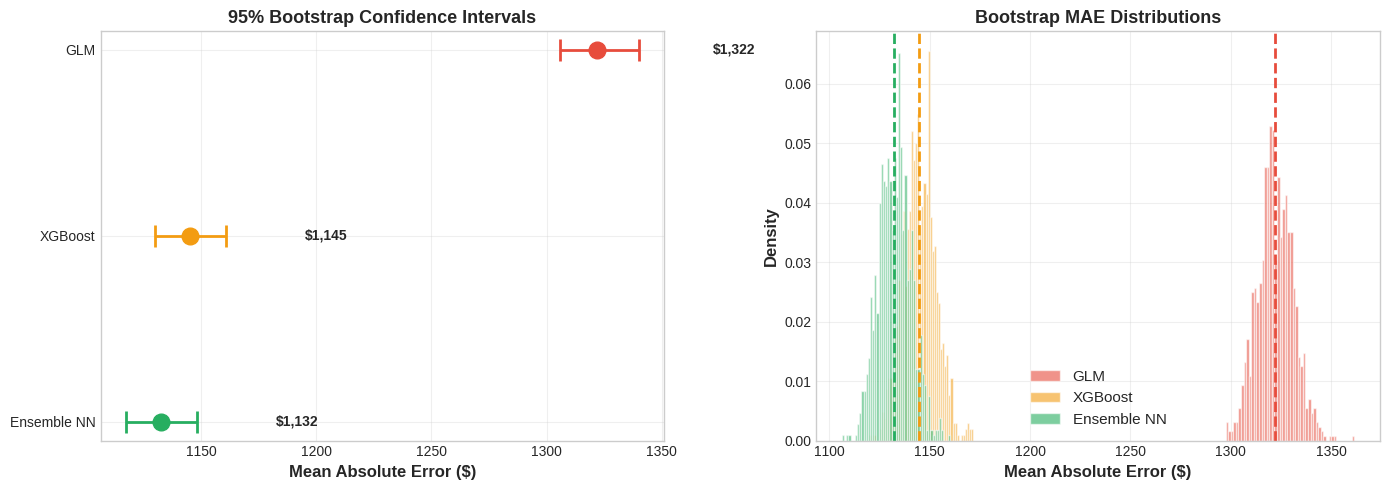


✅ Visualization saved: bootstrap_confidence_intervals.png

ANALYSIS COMPLETE!


In [84]:
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy import stats

print("="*80)
print("BOOTSTRAP CONFIDENCE INTERVAL ANALYSIS")
print("="*80)

# Get predictions (with correct transformations)
test_actual = np.expm1(y_log_test.values)
test_pred_glm = tweedie_glm.predict(X_test)

import xgboost as xgb
test_pred_xgb = np.expm1(xgb_model.predict(X_test))
test_pred_nn = ensemble_test_pred

# Bootstrap settings
n_bootstrap = 1000
n_samples = len(test_actual)

print(f"\n🔄 Running {n_bootstrap} bootstrap iterations...")

# Store bootstrap MAEs
bootstrap_glm = []
bootstrap_xgb = []
bootstrap_nn = []

np.random.seed(42)
for i in range(n_bootstrap):
    # Resample with replacement
    indices = np.random.choice(n_samples, size=n_samples, replace=True)

    actual_sample = test_actual[indices]
    glm_sample = test_pred_glm[indices]
    xgb_sample = test_pred_xgb[indices]
    nn_sample = test_pred_nn[indices]

    # Calculate MAEs
    bootstrap_glm.append(mean_absolute_error(actual_sample, glm_sample))
    bootstrap_xgb.append(mean_absolute_error(actual_sample, xgb_sample))
    bootstrap_nn.append(mean_absolute_error(actual_sample, nn_sample))

    if (i + 1) % 200 == 0:
        print(f"  Progress: {i+1}/{n_bootstrap}")

print("\n✅ Bootstrap complete!")

# Calculate confidence intervals (95%)
glm_ci = np.percentile(bootstrap_glm, [2.5, 97.5])
xgb_ci = np.percentile(bootstrap_xgb, [2.5, 97.5])
nn_ci = np.percentile(bootstrap_nn, [2.5, 97.5])

# Calculate actual MAEs
glm_mae = mean_absolute_error(test_actual, test_pred_glm)
xgb_mae = mean_absolute_error(test_actual, test_pred_xgb)
nn_mae = mean_absolute_error(test_actual, test_pred_nn)

print("\n" + "="*80)
print("RESULTS: 95% CONFIDENCE INTERVALS")
print("="*80)

print(f"\nGLM:")
print(f"  MAE: ${glm_mae:,.2f}")
print(f"  95% CI: [${glm_ci[0]:,.2f}, ${glm_ci[1]:,.2f}]")
print(f"  Width: \u00B1${(glm_ci[1] - glm_ci[0])/2:,.2f}")

print(f"\nXGBoost:")
print(f"  MAE: ${xgb_mae:,.2f}")
print(f"  95% CI: [${xgb_ci[0]:,.2f}, ${xgb_ci[1]:,.2f}]")
print(f"  Width: \u00B1${(xgb_ci[1] - xgb_ci[0])/2:,.2f}")

print(f"\nEnsemble NN:")
print(f"  MAE: ${nn_mae:,.2f}")
print(f"  95% CI: [${nn_ci[0]:,.2f}, ${nn_ci[1]:,.2f}]")
print(f"  Width: \u00B1${(nn_ci[1] - nn_ci[0])/2:,.2f}")

# Check for overlap
print("\n" + "="*80)
print("STATISTICAL SIGNIFICANCE TEST")
print("="*80)

# XGBoost vs NN
xgb_nn_overlap = not (nn_ci[1] < xgb_ci[0] or xgb_ci[1] < nn_ci[0])
diff_xgb_nn = xgb_mae - nn_mae

print(f"\nXGBoost vs Ensemble NN:")
print(f"  Difference: ${diff_xgb_nn:,.2f} ({diff_xgb_nn/xgb_mae*100:.2f}%)")
print(f"  CIs Overlap: {'Yes' if xgb_nn_overlap else 'No'}")

if xgb_nn_overlap:
    print(f"  ⚠️  NOT statistically significant at 95% confidence")
    print(f"      (Both models are effectively tied)")
else:
    print(f"  ✅ Statistically significant at 95% confidence")
    print(f"      (NN is definitively better)")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Confidence Intervals
models = ['GLM', 'XGBoost', 'Ensemble NN']
maes = [glm_mae, xgb_mae, nn_mae]
cis = [glm_ci, xgb_ci, nn_ci]
colors = ['#E74C3C', '#F39C12', '#27AE60']

y_pos = np.arange(len(models))

for i, (model, mae, ci, color) in enumerate(zip(models, maes, cis, colors)):
    ax1.errorbar(mae, i, xerr=[[mae - ci[0]], [ci[1] - mae]],
                 fmt='o', markersize=12, capsize=8, capthick=2,
                 color=color, linewidth=2, label=model)
    ax1.text(mae + 50, i, f'${mae:,.0f}', va='center', fontweight='bold')

ax1.set_yticks(y_pos)
ax1.set_yticklabels(models)
ax1.set_xlabel('Mean Absolute Error ($)', fontsize=12, fontweight='bold')
ax1.set_title('95% Bootstrap Confidence Intervals', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.invert_yaxis()

# Plot 2: Bootstrap Distributions
ax2.hist(bootstrap_glm, bins=50, alpha=0.6, color=colors[0], label='GLM', density=True)
ax2.hist(bootstrap_xgb, bins=50, alpha=0.6, color=colors[1], label='XGBoost', density=True)
ax2.hist(bootstrap_nn, bins=50, alpha=0.6, color=colors[2], label='Ensemble NN', density=True)

ax2.axvline(glm_mae, color=colors[0], linestyle='--', linewidth=2)
ax2.axvline(xgb_mae, color=colors[1], linestyle='--', linewidth=2)
ax2.axvline(nn_mae, color=colors[2], linestyle='--', linewidth=2)

ax2.set_xlabel('Mean Absolute Error ($)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Density', fontsize=12, fontweight='bold')
ax2.set_title('Bootstrap MAE Distributions', fontsize=13, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('bootstrap_confidence_intervals.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved: bootstrap_confidence_intervals.png")
print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)